# DATA

In [ ]:
import pandas as pd
df = pd.read_excel('/content/Data Awal.xlsx')

print("total rows:", df.shape[0])
df.head()

total rows: 4516


,text,score,at,appVersion
0,Kenapa mau bayar yang kedua ngak bisa lagi,3,2025-01-03 12:18:42,1.5.12
1,Alhamdulillah baru mau dtg ngurusin ke Samsat ...,5,2025-01-03 13:41:51,1.5.12
2,Memudahkan kami dalam membayar pajak kendaraan.,5,2025-01-03 15:40:32,1.5.12
3,"STNK 8 BULAN BELUM NYAMPE HATI"" BUAT DAERAH JA...",1,2025-01-03 15:56:40,1.5.12
4,Sangat terbantu adanya pembayaran online pajak...,5,2025-01-03 18:50:53,1.5.12


# CLEANING

## Case Folding

In [ ]:
def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text
df['case_folding'] = df['text'].apply(casefoldingText)
df.head()

,text,score,at,appVersion,case_folding
0,Kenapa mau bayar yang kedua ngak bisa lagi,3,2025-01-03 12:18:42,1.5.12,kenapa mau bayar yang kedua ngak bisa lagi
1,Alhamdulillah baru mau dtg ngurusin ke Samsat ...,5,2025-01-03 13:41:51,1.5.12,alhamdulillah baru mau dtg ngurusin ke samsat ...
2,Memudahkan kami dalam membayar pajak kendaraan.,5,2025-01-03 15:40:32,1.5.12,memudahkan kami dalam membayar pajak kendaraan.
3,"STNK 8 BULAN BELUM NYAMPE HATI"" BUAT DAERAH JA...",1,2025-01-03 15:56:40,1.5.12,"stnk 8 bulan belum nyampe hati"" buat daerah ja..."
4,Sangat terbantu adanya pembayaran online pajak...,5,2025-01-03 18:50:53,1.5.12,sangat terbantu adanya pembayaran online pajak...


## Text Cleaning

In [ ]:
import re
import string

In [ ]:
def cleaningText(text):
    # Add spaces around punctuation to prevent merged words
    text = re.sub(r'([{}])'.format(re.escape(string.punctuation)), r' \1 ', text)

    # Remove emoji and special symbols
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'emoji ', '', text)
    text = re.sub(r'²', '', text)
    text = re.sub(r'â²', '', text)  # remove specific character sequence "â²"

    # Remove specific patterns
    text = re.sub(r'@[\w]+', '', text)  # remove mentions (e.g., @username)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # remove hashtags (e.g., #Hashtag)
    text = re.sub(r'RT[\s]', '', text)  # remove "RT"
    text = re.sub(r"http\S+", '', text)  # remove links (e.g., http://)
    text = re.sub(r'[0-9]+', '', text)  # remove numbers

    # Remove repeated characters (e.g., "loooove" -> "love")
    text = re.sub(r'(\w)\1{2,}', r"\1", text)

    # Clean up extra spaces
    text = re.sub(r'\s+', ' ', text)  # replace multiple spaces with a single space
    text = text.strip()  # remove spaces from beginning and end
    return text

# Apply the cleaning function to the DataFrame
df['removementiondll'] = df['case_folding'].apply(cleaningText)

# Display first 15 rows of the DataFrame
df.head(15)


,text,score,at,appVersion,case_folding,removementiondll
0,Kenapa mau bayar yang kedua ngak bisa lagi,3,2025-01-03 12:18:42,1.5.12,kenapa mau bayar yang kedua ngak bisa lagi,kenapa mau bayar yang kedua ngak bisa lagi
1,Alhamdulillah baru mau dtg ngurusin ke Samsat ...,5,2025-01-03 13:41:51,1.5.12,alhamdulillah baru mau dtg ngurusin ke samsat ...,alhamdulillah baru mau dtg ngurusin ke samsat ...
2,Memudahkan kami dalam membayar pajak kendaraan.,5,2025-01-03 15:40:32,1.5.12,memudahkan kami dalam membayar pajak kendaraan.,memudahkan kami dalam membayar pajak kendaraan
3,"STNK 8 BULAN BELUM NYAMPE HATI"" BUAT DAERAH JA...",1,2025-01-03 15:56:40,1.5.12,"stnk 8 bulan belum nyampe hati"" buat daerah ja...",stnk bulan belum nyampe hati buat daerah jauh ...
4,Sangat terbantu adanya pembayaran online pajak...,5,2025-01-03 18:50:53,1.5.12,sangat terbantu adanya pembayaran online pajak...,sangat terbantu adanya pembayaran online pajak...
5,Cuma buat motor kah? Setiap tahun saya bayar p...,2,2025-01-03 19:50:56,1.5.12,cuma buat motor kah? setiap tahun saya bayar p...,cuma buat motor kah setiap tahun saya bayar pa...
6,Sangat membantu walaupun bekerja diluar daerah...,5,2025-01-03 20:11:27,1.5.12,sangat membantu walaupun bekerja diluar daerah...,sangat membantu walaupun bekerja diluar daerah...
7,sangat mempermudah ya,5,2025-01-03 22:40:30,1.5.12,sangat mempermudah ya,sangat mempermudah ya
8,mempergampang,5,2025-01-04 01:06:52,1.5.12,mempergampang,mempergampang
9,Halaman transaksi sedang di proses tiba2 hilan...,2,2025-01-04 02:07:57,1.5.12,halaman transaksi sedang di proses tiba2 hilan...,halaman transaksi sedang di proses tiba hilang...


## Normalisasi (Kamus Alay)

In [ ]:
# Load existing slang dictionary
kbba_dictionary = pd.read_csv('https://raw.githubusercontent.com/insomniagung/kamus_kbba/main/kbba.txt',
                               delimiter='\t',
                               names=['slang', 'formal'],
                               header=None,
                               encoding='utf-8')
slang_dict = dict(zip(kbba_dictionary['slang'], kbba_dictionary['formal']))

# Add new slang-to-formal mappings (manual)
additional_slang_dict = {
    "plan": "pelan", "plajarin": "pelajari", "smga": "semoga", "krja": "kerja",
    "peggunaanya": "penggunaannya", "ckup": "cukup", "wktu": "waktu", "tnyta": "ternyata",
    "g": "tidak", "sie": "memang", "sudan": "sudah", "sayaa": "saya", "tk": "tidak",
    "pokoknya": "intinya", "musingin": "membingungkan", "daptar": "daftar", "peripikasi": "verifikasi",
    "tida": "tidak", "kmn": "kemana", "bangget": "banget", "repot": "ribet", "kasik": "kasih",
    "pingin": "ingin", "sdgkan": "sedangkan", "unk": "untuk", "sangan": "sangat", "nti": "nanti",
    "vermuk": "verifikasi wajah", "trimakasih": "terimakasih", "bbrpa": "beberapa", "aplk": "aplikasi",
    "memngkinkan": "memungkinkan", "banget": "sekali", "terima kasih": "terimakasih", "sendri": "sendiri",
    "dianter": "antar", "pujabat": "pejabat", "muka": "wajah", "th": "tahun", "reting": "penilaian",
    "ekspectasi": "ekspektasi", "stack": "terhambat", "piyik": "kecil", "diantr": "diantar",
    "kerumaha": "kerumah", "sklian": "sekalian", "ruwet": "ribet", "apl": "aplikasi", "pungli": "pungutan liar",
    "syekali": "sekali", "verid": "verifikasi", "make": "pakai", "review": "penilaian", "kalai": "kali",
    "waja": "wajah", "nga": "tidak", "mksh": "terimakasih", "ajs": "saja", "pesa": "pesan", "negri": "negeri",
    "fto": "foto", "msalah": "masalah", "byar": "bayar", "nyampe": "sampai", "doc": "dokumen", "bgi": "bagi",
    "sibok": "sibuk", "sngat": "sangat", "bermnfaat": "bermanfaat", "tmbhkn": "tambahkan", "bpak": "bapak",
    "ket": "keterangan", "gimna": "bagaimana", "bnar": "benar", "trx": "transaksi", "terlali": "terlalu",
    "memermudah": "mempermudah", "bangett": "sekali", "onlie": "online", "cma": "hanya", "mngguan": "mingguan",
    "gbisa": "tidak bisa", "kelen": "kalian", "gka": "tidak", "ktnya": "katanya", "eror": "error",
    "via": "melalui", "mantabs": "mantap", "ndeso": "kampungan", "dengam": "dengan", "nyoba": "mencoba",
    "lain-lain": "lainnya", "melaui": "melalui", "tertip": "tertib", "gede": "besar", "pjak": "pajak",
    "sllu": "selalu", "wa": "whatsapp", "selvi":  "selfi", "improvement": "perbaikan", "vertifikasi": "verifikasi",
    "sebenernya": "sebenarnya", "cmn": "hanya", "custamer srvis": "customer service", "biaa": "bisa",
    "ats": "atas", "tinggkat": "tingkat", "memepermudah": "mempermudah", "ok": "bagus", "oke": "bagus",
    "trimaksih": "terimakasih", "karnah": "karena", "komplit": "lengkap", "bgtu": "begitu", "adm": "administrasi",
    "gaperlu": "tidak perlu", "lengan": "dengan", "sekaki": "sekali", "ijin": "izin", "cs": "customer service",
    "documentnya": "dokumennya", "kmrin": "kemarin", "by": "melalui", "lgsng": "langsung", "banya": "banyak",
    "aksih": "kasih", "cpat": "cepat", "persisny": "tepatnya", "ove all": "seluruhnya", "lsg": "langsung", "mau": "ingin", "perugasnya":  "petugasnya",
    "thank": "terimakasih", "dak": "tidak", "terimaa": "terima", "bia": "bisa", "apliksi": "aplikasi", "lieur": "membingungkan",
    "tapa": "tanpa", "uaang": "duit", "uang": "duit",  "ditanyan": "ditangan", "plikasi": "aplikasi", "neraga": "negara",
    "rada": "agak", "big thanx": "terimakasih", "pembayrannya": "pembayarannya", "overall": "seluruhnya",
    "belum": "tidak", "ksna": "kesana", "mantab": "mantap", "dicova": "dicoba", "antri": "antre",
    "terima ksh": "terimakasih", "bngt": "sekali", "qta": "kita", "include": "termasuk", "sm":"dengan",
    "kmarin": "kemarin", "gpay":"gopay", "sata":"saya", "skr": "sekarang", "grgr":"karena", "terimakasii":"terimakasih",
    "skitar":"sekitar", "biayaa":"biaya", "ajah":"saja", "e signal":"esignal", "prosea":"proses",
    "namu":"namun", "mudahn":"semoga", "ut":"untuk", "sehinga":"sehingga", "cuma":"hanya", "tudak":"tidak",
    "masya allah":"masyaallah", "rajia":"razia", "jngn":"jangan", "anrti":"antre", "sperti":"seperti",
    "indomart":"indomaret", "laen":"lain", "gapernah":"tidak pernah", "mnambahkan":"menambahkan",
    "because":"karena", "terhububg":"terhubung", "seharusnua":"seharusnya", "pjk":"pajak", "mempergampang":"mempermudah", "nomer":"nomor",
    "loadinh":"loading", "hdehh":"haduh", "aplikasisetelag":"aplikasi setelah", "pbayaran":"pembayaran", "waktuasih":"waktu masih"

}

# Merge dictionaries
slang_dict.update(additional_slang_dict)

# Define the function to convert slang to formal words
def convert_slangword(text):
    words = text.split()
    normalized_words = [slang_dict[word] if word in slang_dict else word for word in words]
    normalized_text = ' '.join(normalized_words)
    return normalized_text

# Apply the function to clean text column
#df_clean['kamusalay'] = df_clean['removementiondll'].apply(convert_slangword)
df['kamusalay'] = df['text'].apply(convert_slangword)

# Display first 20 rows of the DataFrame
#df_clean.head(20)
df.head(20)


,text,score,at,appVersion,case_folding,removementiondll,kamusalay
0,Kenapa mau bayar yang kedua ngak bisa lagi,3,2025-01-03 12:18:42,1.5.12,kenapa mau bayar yang kedua ngak bisa lagi,kenapa mau bayar yang kedua ngak bisa lagi,Kenapa ingin bayar yang kedua tidak bisa lagi
1,Alhamdulillah baru mau dtg ngurusin ke Samsat ...,5,2025-01-03 13:41:51,1.5.12,alhamdulillah baru mau dtg ngurusin ke samsat ...,alhamdulillah baru mau dtg ngurusin ke samsat ...,Alhamdulillah baru ingin datang ngurusin ke Sa...
2,Memudahkan kami dalam membayar pajak kendaraan.,5,2025-01-03 15:40:32,1.5.12,memudahkan kami dalam membayar pajak kendaraan.,memudahkan kami dalam membayar pajak kendaraan,Memudahkan kami dalam membayar pajak kendaraan.
3,"STNK 8 BULAN BELUM NYAMPE HATI"" BUAT DAERAH JA...",1,2025-01-03 15:56:40,1.5.12,"stnk 8 bulan belum nyampe hati"" buat daerah ja...",stnk bulan belum nyampe hati buat daerah jauh ...,"STNK 8 BULAN BELUM NYAMPE HATI"" BUAT DAERAH JA..."
4,Sangat terbantu adanya pembayaran online pajak...,5,2025-01-03 18:50:53,1.5.12,sangat terbantu adanya pembayaran online pajak...,sangat terbantu adanya pembayaran online pajak...,Sangat terbantu adanya pembayaran online pajak...
5,Cuma buat motor kah? Setiap tahun saya bayar p...,2,2025-01-03 19:50:56,1.5.12,cuma buat motor kah? setiap tahun saya bayar p...,cuma buat motor kah setiap tahun saya bayar pa...,Cuma buat motor kah? Setiap tahun saya bayar p...
6,Sangat membantu walaupun bekerja diluar daerah...,5,2025-01-03 20:11:27,1.5.12,sangat membantu walaupun bekerja diluar daerah...,sangat membantu walaupun bekerja diluar daerah...,Sangat membantu walaupun bekerja diluar daerah...
7,sangat mempermudah ya,5,2025-01-03 22:40:30,1.5.12,sangat mempermudah ya,sangat mempermudah ya,sangat mempermudah iya
8,mempergampang,5,2025-01-04 01:06:52,1.5.12,mempergampang,mempergampang,mempermudah
9,Halaman transaksi sedang di proses tiba2 hilan...,2,2025-01-04 02:07:57,1.5.12,halaman transaksi sedang di proses tiba2 hilan...,halaman transaksi sedang di proses tiba hilang...,Halaman transaksi sedang di proses tiba2 hilan...


## Duplicate Data

In [ ]:
dup = df.duplicated(subset=['text'])
print("duplicate data:", dup.sum())

df_clean = df.drop_duplicates(subset=['text'])

print("total rows after remove duplicate data:", df_clean.shape[0])

duplicate data: 217
total rows after remove duplicate data: 4299


In [ ]:
duplicate_data = df[dup]
print("Duplicate rows:\n", duplicate_data)

Duplicate rows:
                     text  score                  at appVersion  \
2939                 oke      5 2025-03-30 20:46:43     1.5.12   
2944              mantab      5 2025-03-30 05:22:40     1.5.12   
2948              Mantap      5 2025-03-30 01:05:12     1.5.12   
2967     sangat membantu      5 2025-03-28 03:43:20     1.5.12   
2973  sangat mempermudah      5 2025-03-27 12:02:44     1.5.12   
...                  ...    ...                 ...        ...   
4491             terbaik      5 2025-03-01 06:54:58     1.5.12   
4496             terbaik      5 2025-03-01 05:57:45     1.5.12   
4497     Cepat prosesnya      5 2025-03-01 05:36:28     1.5.12   
4506          luar biasa      5 2025-03-01 04:01:30     1.5.12   
4510                nice      5 2025-03-01 01:47:30     1.5.12   

            case_folding    removementiondll           kamusalay  
2939                 oke                 oke               bagus  
2944              mantab              mantab            

# Labeling

## Based on Users Rating
Akan diberi label dengan ketentuan:

*   Jika score bernilai 4 atau 5 maka labelnya 'positive'
*   Jika score bernilai 3 maka labelnya 'neutral'
*   Jika score bernilai 1 atau 2 maka labelnya 'negative'

In [ ]:
# Menambahkan kolom 'label' berdasarkan nilai pada kolom 'score'
def assign_label(score):
    if score in [1, 2]:
        return 'negative'
    elif score == 3:
        return 'neutral'
    elif score in [4, 5]:
        return 'positive'

df_clean['label_rating'] = df_clean['score'].apply(assign_label)

df_clean.head(15)

/tmp/ipython-input-32-3545128366.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['label_rating'] = df_clean['score'].apply(assign_label)


,text,score,at,appVersion,case_folding,removementiondll,kamusalay,label_rating
0,Kenapa mau bayar yang kedua ngak bisa lagi,3,2025-01-03 12:18:42,1.5.12,kenapa mau bayar yang kedua ngak bisa lagi,kenapa mau bayar yang kedua ngak bisa lagi,Kenapa ingin bayar yang kedua tidak bisa lagi,neutral
1,Alhamdulillah baru mau dtg ngurusin ke Samsat ...,5,2025-01-03 13:41:51,1.5.12,alhamdulillah baru mau dtg ngurusin ke samsat ...,alhamdulillah baru mau dtg ngurusin ke samsat ...,Alhamdulillah baru ingin datang ngurusin ke Sa...,positive
2,Memudahkan kami dalam membayar pajak kendaraan.,5,2025-01-03 15:40:32,1.5.12,memudahkan kami dalam membayar pajak kendaraan.,memudahkan kami dalam membayar pajak kendaraan,Memudahkan kami dalam membayar pajak kendaraan.,positive
3,"STNK 8 BULAN BELUM NYAMPE HATI"" BUAT DAERAH JA...",1,2025-01-03 15:56:40,1.5.12,"stnk 8 bulan belum nyampe hati"" buat daerah ja...",stnk bulan belum nyampe hati buat daerah jauh ...,"STNK 8 BULAN BELUM NYAMPE HATI"" BUAT DAERAH JA...",negative
4,Sangat terbantu adanya pembayaran online pajak...,5,2025-01-03 18:50:53,1.5.12,sangat terbantu adanya pembayaran online pajak...,sangat terbantu adanya pembayaran online pajak...,Sangat terbantu adanya pembayaran online pajak...,positive
5,Cuma buat motor kah? Setiap tahun saya bayar p...,2,2025-01-03 19:50:56,1.5.12,cuma buat motor kah? setiap tahun saya bayar p...,cuma buat motor kah setiap tahun saya bayar pa...,Cuma buat motor kah? Setiap tahun saya bayar p...,negative
6,Sangat membantu walaupun bekerja diluar daerah...,5,2025-01-03 20:11:27,1.5.12,sangat membantu walaupun bekerja diluar daerah...,sangat membantu walaupun bekerja diluar daerah...,Sangat membantu walaupun bekerja diluar daerah...,positive
7,sangat mempermudah ya,5,2025-01-03 22:40:30,1.5.12,sangat mempermudah ya,sangat mempermudah ya,sangat mempermudah iya,positive
8,mempergampang,5,2025-01-04 01:06:52,1.5.12,mempergampang,mempergampang,mempermudah,positive
9,Halaman transaksi sedang di proses tiba2 hilan...,2,2025-01-04 02:07:57,1.5.12,halaman transaksi sedang di proses tiba2 hilan...,halaman transaksi sedang di proses tiba hilang...,Halaman transaksi sedang di proses tiba2 hilan...,negative


In [ ]:
# Menghitung jumlah data untuk setiap label
label_counts = df_clean['label_rating'].value_counts()

# Menampilkan jumlah data per label
print("Jumlah data per label:")
print(label_counts)

# Jika ingin menampilkan hasil dalam bentuk persentase
label_percentages = df_clean['label_rating'].value_counts(normalize=True) * 100
print("\nPersentase data per label:")
print(label_percentages)

Jumlah data per label:
label_rating
positive    3119
negative     982
neutral      198
Name: count, dtype: int64

Persentase data per label:
label_rating
positive    72.551756
negative    22.842522
neutral      4.605722
Name: proportion, dtype: float64


## Using Indobert Sentiment Pretrained

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# Load pretrained model dan tokenizer
pretrained = "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

# Buat pipeline sentiment analysis
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Mapping label
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

# Pastikan data bersih
df_clean = df_clean.dropna(subset=['kamusalay'])
df_clean['kamusalay'] = df_clean['kamusalay'].astype(str)

# Proses sentiment analysis untuk seluruh data
results = sentiment_analysis(list(df_clean['kamusalay']))
df_clean['label_indobert'] = [label_index[result['label']] for result in results]

# Tampilkan hasil
df_clean.head()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


,text,score,at,case_folding,removementiondll,kamusalay,label_rating,label_inset,label_indobert
0,Kenapa mau bayar yang kedua ngak bisa lagi,3,2025-01-03 12:18:42,kenapa mau bayar yang kedua ngak bisa lagi,kenapa mau bayar yang kedua ngak bisa lagi,kenapa ingin bayar yang kedua tidak bisa lagi,neutral,positive,negative
1,Alhamdulillah baru mau dtg ngurusin ke Samsat ...,5,2025-01-03 13:41:51,alhamdulillah baru mau dtg ngurusin ke samsat ...,alhamdulillah baru mau dtg ngurusin ke samsat ...,alhamdulillah baru ingin datang ngurusin ke sa...,positive,positive,negative
2,Memudahkan kami dalam membayar pajak kendaraan.,5,2025-01-03 15:40:32,memudahkan kami dalam membayar pajak kendaraan.,memudahkan kami dalam membayar pajak kendaraan,memudahkan kami dalam membayar pajak kendaraan,positive,positive,neutral
3,"STNK 8 BULAN BELUM NYAMPE HATI"" BUAT DAERAH JA...",1,2025-01-03 15:56:40,"stnk 8 bulan belum nyampe hati"" buat daerah ja...",stnk bulan belum nyampe hati buat daerah jauh ...,stnk bulan tidak sampai hati buat daerah jauh ...,negative,positive,negative
4,Sangat terbantu adanya pembayaran online pajak...,5,2025-01-03 18:50:53,sangat terbantu adanya pembayaran online pajak...,sangat terbantu adanya pembayaran online pajak...,sangat terbantu adanya pembayaran online pajak...,positive,positive,positive


In [ ]:
df_clean.to_excel('Data Modelling.xlsx', index=False)

# DATA DISTRIBUTION

## Data Full

In [ ]:
import pandas as pd
df = pd.read_excel('/content/Data Modelling.xlsx')
df.head()

,text,label,at,appVersion
0,kenapa ingin bayar yang kedua tidak bisa lagi,negative,2025-01-03 12:18:42,1.5.12
1,alhamdulillah baru ingin datang ngurusin ke sa...,positive,2025-01-03 13:41:51,1.5.12
2,memudahkan kami dalam membayar pajak kendaraan,positive,2025-01-03 15:40:32,1.5.12
3,stnk bulan tidak sampai hati buat daerah jauh ...,negative,2025-01-03 15:56:40,1.5.12
4,sangat terbantu adanya pembayaran online pajak...,positive,2025-01-03 18:50:53,1.5.12


<ipython-input-15-c3920e44ebdc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-15-c3920e44ebdc>:12: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(


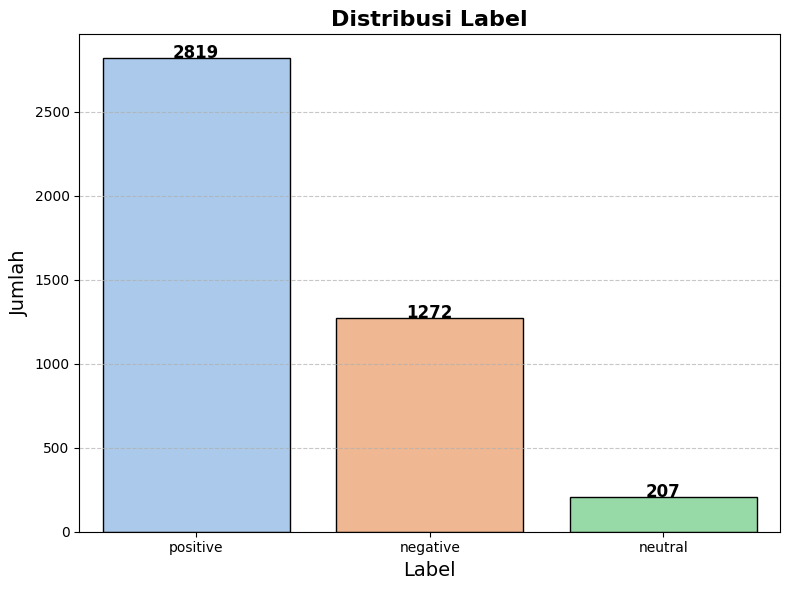

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah data untuk setiap label
label_counts = df['label'].value_counts()

# Membuat barchart menggunakan seaborn
plt.figure(figsize=(8, 6))
palette = sns.color_palette("pastel")

sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    palette=palette,
    edgecolor='black'
)

# Menambahkan judul dan label sumbu
plt.title('Distribusi Label', fontsize=16, fontweight='bold')
plt.xlabel('Label', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)

# Menambahkan angka di atas setiap bar dengan jarak lebih jauh
for i, count in enumerate(label_counts):
    plt.text(
        i, count + 2, str(count),
        ha='center', fontsize=12, fontweight='bold', color='black'
    )

# Menambahkan garis grid horizontal untuk memperjelas nilai
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.tight_layout()
plt.show()

## Data Split 70:15:15

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Map label
df["label"] = df["label"].map({
    'positive': 0, 'negative': 1, 'neutral': 2
})

# Random seed
RANDOM_SEED = 42

# Split into train + temp (15% val + 15% test = 30%) with stratification
df_train, df_temp = train_test_split(
    df,
    test_size=0.3,
    random_state=RANDOM_SEED,
    stratify=df["label"]
)

# Split temp into validation and test (each 15%) with stratification
df_val, df_test = train_test_split(
    df_temp,
    test_size=0.5,
    random_state=RANDOM_SEED,
    stratify=df_temp["label"]
)

# Save to CSV
df_train.to_csv("train.csv", index=False)
df_val.to_csv("val.csv", index=False)
df_test.to_csv("test.csv", index=False)

print(f"Train size: {len(df_train)}, Validation size: {len(df_val)}, Test size: {len(df_test)}")


Train size: 3008, Validation size: 645, Test size: 645


In [ ]:
print("Jumlah baris pada df_train:", len(df_train))
print("Jumlah baris pada df_val:", len(df_val))
print("Jumlah baris pada df_test:", len(df_test))

Jumlah baris pada df_train: 3008
Jumlah baris pada df_val: 645
Jumlah baris pada df_test: 645


<ipython-input-6-953f3307ffe4>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-6-953f3307ffe4>:13: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(
<ipython-input-6-953f3307ffe4>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-6-953f3307ffe4>:29: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(
<ipython-input-6-953f3307ffe4>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-in

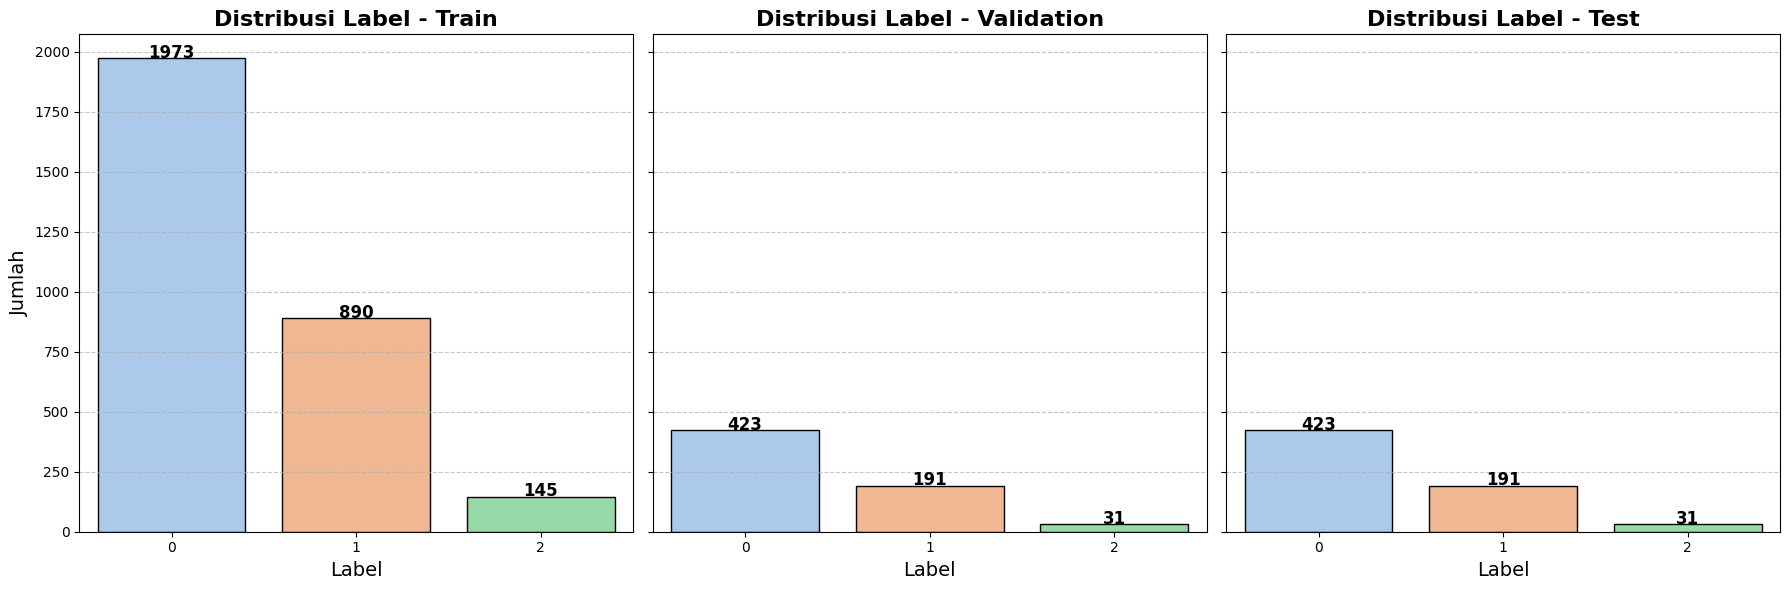

In [ ]:
# Menghitung jumlah data untuk setiap label pada train, validation, dan test
train_counts = df_train['label'].value_counts()
val_counts = df_val['label'].value_counts()
test_counts = df_test['label'].value_counts()

# Membuat tiga subplot untuk bar chart train, validation, dan test
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Palet warna
palette = sns.color_palette("pastel")

# Plot untuk data train
sns.barplot(
    x=train_counts.index, y=train_counts.values,
    palette=palette, edgecolor='black', ax=axes[0]
)
axes[0].set_title('Distribusi Label - Train', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Label', fontsize=14)
axes[0].set_ylabel('Jumlah', fontsize=14)

# Menambahkan angka di atas setiap bar untuk train
for i, count in enumerate(train_counts):
    axes[0].text(
        i, count + 2, str(count),
        ha='center', fontsize=12, fontweight='bold', color='black'
    )

# Plot untuk data validation
sns.barplot(
    x=val_counts.index, y=val_counts.values,
    palette=palette, edgecolor='black', ax=axes[1]
)
axes[1].set_title('Distribusi Label - Validation', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Label', fontsize=14)
axes[1].set_ylabel('Jumlah', fontsize=14)

# Menambahkan angka di atas setiap bar untuk validation
for i, count in enumerate(val_counts):
    axes[1].text(
        i, count + 2, str(count),
        ha='center', fontsize=12, fontweight='bold', color='black'
    )

# Plot untuk data test
sns.barplot(
    x=test_counts.index, y=test_counts.values,
    palette=palette, edgecolor='black', ax=axes[2]
)
axes[2].set_title('Distribusi Label - Test', fontsize=16, fontweight='bold')
axes[2].set_xlabel('Label', fontsize=14)
axes[2].set_ylabel('Jumlah', fontsize=14)

# Menambahkan angka di atas setiap bar untuk test
for i, count in enumerate(test_counts):
    axes[2].text(
        i, count + 2, str(count),
        ha='center', fontsize=12, fontweight='bold', color='black'
    )

# Menambahkan garis grid horizontal untuk memperjelas nilai
for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.tight_layout()
plt.show()


# PREPARE

In [ ]:
!pip install evaluate
!pip install datasets

In [ ]:
!pip install optuna

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from transformers import AutoTokenizer, Trainer, TrainingArguments, AutoModelForSequenceClassification
from transformers.modeling_outputs import SequenceClassifierOutput
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, make_scorer, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
import evaluate

# Load Data

In [ ]:
# Load splitting dataset
import pandas as pd
from datasets import load_dataset # This line is needed to import load_dataset function

#files = {"train": "train.csv", "val":"val.csv", "test": "test.csv"}
#dataset = load_dataset('csv', data_files=files)
df_train = pd.read_csv('/content/train.csv')
df_val = pd.read_csv('/content/val.csv')
df_test = pd.read_csv('/content/test.csv')

In [ ]:
# Mencari index data yang kosong pada kolom 'text' di df_train
empty_text_index_train = df_train[df_train['text'].isnull()].index.tolist()
print("Index data yang kosong pada kolom 'text' di df_train:", empty_text_index_train)

empty_text_index_val = df_val[df_val['text'].isnull()].index.tolist()
print("Index data yang kosong pada kolom 'text' di df_val:", empty_text_index_val)

# Mencari index data yang kosong pada kolom 'text' di df_test
empty_text_index_test = df_test[df_test['text'].isnull()].index.tolist()
print("Index data yang kosong pada kolom 'text' di df_test:", empty_text_index_test)

Index data yang kosong pada kolom 'text' di df_train: []
Index data yang kosong pada kolom 'text' di df_val: []
Index data yang kosong pada kolom 'text' di df_test: []


In [ ]:
train_texts= df_train['text']
train_labels=df_train['label']
val_texts=df_val['text']
val_labels=df_val['label']
test_texts=df_test['text']
test_labels=df_test['label']

# Eksplorasi

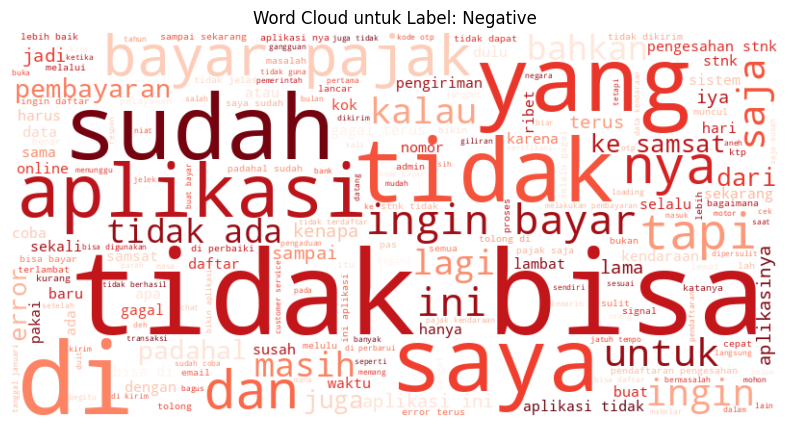

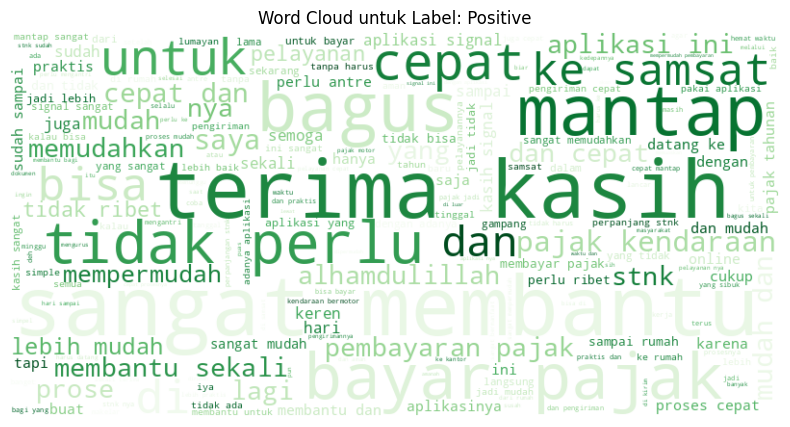

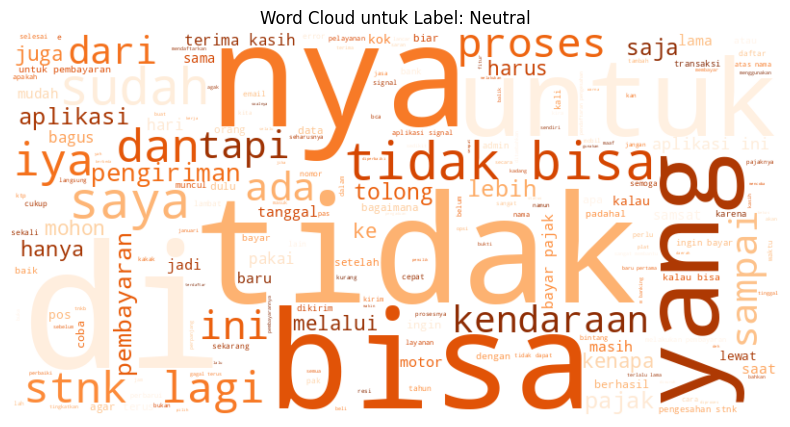

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df["label"] = df["label"].map({
    'positive': 0, 'negative': 1, 'neutral': 2
})

# Mapping label ke nama dan warna (gunakan nama colormap valid)
label_details = {
    0: {'name': 'Positive', 'color': 'Greens'},  # Use 'Greens' colormap
    1: {'name': 'Negative', 'color': 'Reds'},    # Use 'Reds' colormap
    2: {'name': 'Neutral', 'color': 'Oranges'}  # Use 'Oranges' colormap or another suitable one
}

# Fungsi untuk membuat word cloud dengan warna sesuai label
def generate_wordcloud(text, label_name, color):
    # Handle empty text input to avoid errors
    if not text:
        print(f"No text available for label: {label_name}")
        return

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=color  # Use the colormap name from label_details
    ).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud untuk Label: {label_name}')
    plt.show()

# Proses untuk setiap label
# Filter df untuk memastikan hanya label yang ada yang diproses
existing_labels = df["label"].unique()

for label in existing_labels:
    if label in label_details:
        details = label_details[label]
        # Gabungkan teks berdasarkan label
        texts = " ".join(df[df["label"] == label]["text"].dropna()) # Handle potential NaN in text column
        # Buat word cloud dengan warna sesuai label
        generate_wordcloud(texts, details['name'], details['color'])
    else:
        print(f"Label {label} not found in label_details mapping. Skipping wordcloud.")

# SENTIMENT ANALYSIS

## Example of Output AutoTokenizer

In [ ]:
from transformers import AutoTokenizer

# Inisialisasi tokenizer
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

# Kalimat input
sentence = "sangat membantu untuk para perantau terima kasih signal"

# Tokenisasi dengan penambahan CLS dan SEP
encoded = tokenizer(sentence,
                    padding="max_length",
                    truncation=True,
                    max_length=512,
                    return_tensors="pt")

# Hasil tokenisasi
input_ids = encoded['input_ids'][0]  # ID token
attention_mask = encoded['attention_mask'][0]  # Masking token

# Tampilkan hasil tokenisasi
print("Tokens (with CLS and SEP):", tokenizer.convert_ids_to_tokens(input_ids))
print("Input IDs:", input_ids.tolist())
print("Attention Mask:", attention_mask.tolist())


Tokens (with CLS and SEP): ['[CLS]', 'sangat', 'membantu', 'untuk', 'para', 'perant', '##au', 'terima', 'kasih', 'signal', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PA

## No Treatment

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, AutoConfig, AdamWeightDecay
import numpy as np
import optuna
from sklearn.metrics import f1_score, classification_report
import random
import os

SEED = 42

# Set seed
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

# Prepare train, validation, and test texts and labels
train_texts = df_train['text']
train_labels = df_train['label']
val_texts = df_val['text']
val_labels = df_val['label']
test_texts = df_test['text']
test_labels = df_test['label']

# Tokenize train, val, and test data
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=256, return_tensors='tf')
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=256, return_tensors='tf')
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=256, return_tensors='tf')

train_labels_np = np.array(train_labels)
val_labels_np = np.array(val_labels)

# Early stopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, mode='min', restore_best_weights=True
)

def create_model(trial):
    hidden_dropout_prob = trial.suggest_float("hidden_dropout_prob", 0.1, 0.5)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    config = AutoConfig.from_pretrained(
        "indobenchmark/indobert-base-p1",
        num_labels=3,
        hidden_dropout_prob=hidden_dropout_prob,
    )

    model = TFAutoModelForSequenceClassification.from_pretrained(
        "indobenchmark/indobert-base-p1",
        config=config,
    )

    optimizer = AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.05)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model, batch_size

def objective(trial):
    model, batch_size = create_model(trial)

    # Dataset
    train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels_np)).shuffle(1000, seed=SEED).batch(batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_np)).shuffle(1000, seed=SEED).batch(batch_size)

    # Train
    model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=30,
        callbacks=[early_stopping_callback],
        verbose=1
    )

    # Predict on validation set
    val_logits = model.predict(val_dataset).logits
    val_preds = np.argmax(val_logits, axis=1)

    # Compute macro F1
    f1 = f1_score(val_labels_np, val_preds, average='macro')

    # Optuna default direction is "minimize"
    return f1  # or set direction="maximize" and return f1

# Run Optuna study
sampler = optuna.samplers.TPESampler(seed=SEED)
study = optuna.create_study(direction="maximize", sampler=sampler)  # or direction="maximize" if return f1
study.optimize(objective, n_trials=10)

print("Best hyperparameters:", study.best_params)

# Train final model with best params
best_model, best_batch_size = create_model(study.best_trial)
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels_np)).shuffle(1000).batch(best_batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_np)).batch(best_batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels)).batch(best_batch_size)

# Save best model (optionally validate again)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model/checkpoint-{epoch:02d}',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    verbose=1
)

# Final training
best_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30,
    callbacks=[checkpoint_callback, early_stopping_callback],
    verbose=1
)

# Save model and tokenizer
best_model.save_pretrained("model")
tokenizer.save_pretrained("model")

# Final evaluation on test set
test_logits = best_model.predict(test_dataset).logits
test_preds = np.argmax(test_logits, axis=1)

print("Final Test Classification Report:")
print(classification_report(test_labels, test_preds, digits=4))

[I 2025-06-08 15:03:06,305] A new study created in memory with name: no-name-6da6b5c0-9ff1-4694-a337-65538d6cf013
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
188/188 [==============================] - 99s 402ms/step - loss: 0.3249 - accuracy: 0.8923 - val_loss: 0.1940 - val_accuracy: 0.9349
Epoch 2/30
188/188 [==============================] - 71s 378ms/step - loss: 0.1988 - accuracy: 0.9382 - val_loss: 0.2109 - val_accuracy: 0.9333
Epoch 3/30
188/188 [==============================] - 72s 381ms/step - loss: 0.1535 - accuracy: 0.9481 - val_loss: 0.1750 - val_accuracy: 0.9395
Epoch 4/30
188/188 [==============================] - 71s 378ms/step - loss: 0.1247 - accuracy: 0.9591 - val_loss: 0.2000 - val_accuracy: 0.9333
Epoch 5/30
188/188 [==============================] - 71s 379ms/step - loss: 0.1026 - accuracy: 0.9644 - val_loss: 0.2296 - val_accuracy: 0.9318
Epoch 6/30
188/188 [==============================] - 71s 378ms/step - loss: 0.0737 - accuracy: 0.9764 - val_loss: 0.2415 - val_accuracy: 0.9411
Epoch 7/30
188/188 [==============================] - 71s 380ms/step - loss: 0.0673 - accuracy: 0.9771 - val_loss: 0.2511 - val_ac

[I 2025-06-08 15:13:34,935] Trial 0 finished with value: 0.818842879333248 and parameters: {'hidden_dropout_prob': 0.39608307024351674, 'batch_size': 16}. Best is trial 0 with value: 0.818842879333248.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
188/188 [==============================] - 94s 401ms/step - loss: 0.3815 - accuracy: 0.8604 - val_loss: 0.2305 - val_accuracy: 0.9163
Epoch 2/30
188/188 [==============================] - 72s 382ms/step - loss: 0.2330 - accuracy: 0.9219 - val_loss: 0.2094 - val_accuracy: 0.9256
Epoch 3/30
188/188 [==============================] - 72s 381ms/step - loss: 0.2009 - accuracy: 0.9332 - val_loss: 0.2047 - val_accuracy: 0.9349
Epoch 4/30
188/188 [==============================] - 71s 380ms/step - loss: 0.1665 - accuracy: 0.9412 - val_loss: 0.2543 - val_accuracy: 0.9163
Epoch 5/30
188/188 [==============================] - 72s 381ms/step - loss: 0.1495 - accuracy: 0.9478 - val_loss: 0.2051 - val_accuracy: 0.9333
Epoch 6/30
188/188 [==============================] - 72s 381ms/step - loss: 0.1318 - accuracy: 0.9558 - val_loss: 0.2176 - val_accuracy: 0.9287
Epoch 7/30
188/188 [==============================] - 72s 381ms/step - loss: 0.1202 - accuracy: 0.9591 - val_loss: 0.2752 - val_ac

[I 2025-06-08 15:24:31,958] Trial 1 finished with value: 0.7561993561993562 and parameters: {'hidden_dropout_prob': 0.49988280239232374, 'batch_size': 16}. Best is trial 0 with value: 0.818842879333248.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
188/188 [==============================] - 94s 405ms/step - loss: 0.2879 - accuracy: 0.9009 - val_loss: 0.1916 - val_accuracy: 0.9302
Epoch 2/30
188/188 [==============================] - 72s 383ms/step - loss: 0.1518 - accuracy: 0.9485 - val_loss: 0.1879 - val_accuracy: 0.9380
Epoch 3/30
188/188 [==============================] - 71s 379ms/step - loss: 0.1003 - accuracy: 0.9674 - val_loss: 0.2051 - val_accuracy: 0.9395
Epoch 4/30
188/188 [==============================] - 72s 381ms/step - loss: 0.0702 - accuracy: 0.9771 - val_loss: 0.1949 - val_accuracy: 0.9349
Epoch 5/30
188/188 [==============================] - 71s 380ms/step - loss: 0.0391 - accuracy: 0.9874 - val_loss: 0.2680 - val_accuracy: 0.9333
Epoch 6/30
188/188 [==============================] - 71s 379ms/step - loss: 0.0379 - accuracy: 0.9877 - val_loss: 0.2730 - val_accuracy: 0.9302
Epoch 7/30
41/41 [==============================] - 7s 115ms/step


[I 2025-06-08 15:33:45,526] Trial 2 finished with value: 0.7985757552812901 and parameters: {'hidden_dropout_prob': 0.20215453571894068, 'batch_size': 16}. Best is trial 0 with value: 0.818842879333248.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
94/94 [==============================] - 90s 752ms/step - loss: 0.3110 - accuracy: 0.8939 - val_loss: 0.2011 - val_accuracy: 0.9178
Epoch 2/30
94/94 [==============================] - 66s 703ms/step - loss: 0.1635 - accuracy: 0.9448 - val_loss: 0.1668 - val_accuracy: 0.9442
Epoch 3/30
94/94 [==============================] - 66s 702ms/step - loss: 0.1083 - accuracy: 0.9631 - val_loss: 0.1988 - val_accuracy: 0.9411
Epoch 4/30
94/94 [==============================] - 66s 703ms/step - loss: 0.0787 - accuracy: 0.9724 - val_loss: 0.1966 - val_accuracy: 0.9333
Epoch 5/30
94/94 [==============================] - 65s 693ms/step - loss: 0.0484 - accuracy: 0.9811 - val_loss: 0.2567 - val_accuracy: 0.9333
Epoch 6/30
94/94 [==============================] - 65s 695ms/step - loss: 0.0285 - accuracy: 0.9924 - val_loss: 0.2395 - val_accuracy: 0.9426
Epoch 7/30
21/21 [==============================] - 7s 208ms/step


[I 2025-06-08 15:42:47,314] Trial 3 finished with value: 0.8383429316581786 and parameters: {'hidden_dropout_prob': 0.22999377058539322, 'batch_size': 32}. Best is trial 3 with value: 0.8383429316581786.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
94/94 [==============================] - 89s 763ms/step - loss: 0.3534 - accuracy: 0.8703 - val_loss: 0.2279 - val_accuracy: 0.9240
Epoch 2/30
94/94 [==============================] - 66s 704ms/step - loss: 0.1993 - accuracy: 0.9335 - val_loss: 0.1807 - val_accuracy: 0.9333
Epoch 3/30
94/94 [==============================] - 66s 699ms/step - loss: 0.1587 - accuracy: 0.9465 - val_loss: 0.1643 - val_accuracy: 0.9426
Epoch 4/30
94/94 [==============================] - 66s 705ms/step - loss: 0.1156 - accuracy: 0.9578 - val_loss: 0.1799 - val_accuracy: 0.9442
Epoch 5/30
94/94 [==============================] - 65s 694ms/step - loss: 0.0837 - accuracy: 0.9701 - val_loss: 0.2062 - val_accuracy: 0.9333
Epoch 6/30
94/94 [==============================] - 66s 704ms/step - loss: 0.0693 - accuracy: 0.9771 - val_loss: 0.2411 - val_accuracy: 0.9240
Epoch 7/30
94/94 [==============================] - 66s 700ms/step - loss: 0.0638 - accuracy: 0.9807 - val_loss: 0.2462 - val_accuracy: 0.9349

[I 2025-06-08 15:52:38,265] Trial 4 finished with value: 0.8118965446402893 and parameters: {'hidden_dropout_prob': 0.3641562947720737, 'batch_size': 32}. Best is trial 3 with value: 0.8383429316581786.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
94/94 [==============================] - 87s 747ms/step - loss: 0.3665 - accuracy: 0.8727 - val_loss: 0.2476 - val_accuracy: 0.9147
Epoch 2/30
94/94 [==============================] - 66s 703ms/step - loss: 0.2085 - accuracy: 0.9275 - val_loss: 0.2053 - val_accuracy: 0.9318
Epoch 3/30
94/94 [==============================] - 66s 704ms/step - loss: 0.1799 - accuracy: 0.9392 - val_loss: 0.2231 - val_accuracy: 0.9271
Epoch 4/30
94/94 [==============================] - 67s 708ms/step - loss: 0.1466 - accuracy: 0.9461 - val_loss: 0.1945 - val_accuracy: 0.9349
Epoch 5/30
94/94 [==============================] - 66s 700ms/step - loss: 0.1249 - accuracy: 0.9558 - val_loss: 0.2727 - val_accuracy: 0.9225
Epoch 6/30
94/94 [==============================] - 65s 695ms/step - loss: 0.0990 - accuracy: 0.9641 - val_loss: 0.2737 - val_accuracy: 0.9411
Epoch 7/30
94/94 [==============================] - 66s 698ms/step - loss: 0.0820 - accuracy: 0.9714 - val_loss: 0.2427 - val_accuracy: 0.9395

[I 2025-06-08 16:03:49,390] Trial 5 finished with value: 0.781368651049502 and parameters: {'hidden_dropout_prob': 0.40917982931115304, 'batch_size': 32}. Best is trial 3 with value: 0.8383429316581786.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
47/47 [==============================] - 87s 1s/step - loss: 0.4444 - accuracy: 0.8314 - val_loss: 0.2234 - val_accuracy: 0.9225
Epoch 2/30
47/47 [==============================] - 62s 1s/step - loss: 0.1955 - accuracy: 0.9348 - val_loss: 0.1887 - val_accuracy: 0.9287
Epoch 3/30
47/47 [==============================] - 62s 1s/step - loss: 0.1518 - accuracy: 0.9471 - val_loss: 0.2009 - val_accuracy: 0.9411
Epoch 4/30
47/47 [==============================] - 62s 1s/step - loss: 0.1218 - accuracy: 0.9594 - val_loss: 0.1892 - val_accuracy: 0.9271
Epoch 5/30
47/47 [==============================] - 62s 1s/step - loss: 0.1000 - accuracy: 0.9658 - val_loss: 0.2045 - val_accuracy: 0.9349
Epoch 6/30
47/47 [==============================] - 62s 1s/step - loss: 0.0883 - accuracy: 0.9697 - val_loss: 0.2314 - val_accuracy: 0.9333
Epoch 7/30
11/11 [==============================] - 7s 379ms/step


[I 2025-06-08 16:11:56,718] Trial 6 finished with value: 0.764556637603588 and parameters: {'hidden_dropout_prob': 0.3464930290051581, 'batch_size': 64}. Best is trial 3 with value: 0.8383429316581786.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
188/188 [==============================] - 92s 403ms/step - loss: 0.2802 - accuracy: 0.9043 - val_loss: 0.1822 - val_accuracy: 0.9318
Epoch 2/30
188/188 [==============================] - 72s 381ms/step - loss: 0.1454 - accuracy: 0.9501 - val_loss: 0.1931 - val_accuracy: 0.9395
Epoch 3/30
188/188 [==============================] - 72s 382ms/step - loss: 0.0848 - accuracy: 0.9707 - val_loss: 0.1741 - val_accuracy: 0.9442
Epoch 4/30
188/188 [==============================] - 71s 377ms/step - loss: 0.0467 - accuracy: 0.9850 - val_loss: 0.2613 - val_accuracy: 0.9318
Epoch 5/30
188/188 [==============================] - 71s 377ms/step - loss: 0.0358 - accuracy: 0.9894 - val_loss: 0.2189 - val_accuracy: 0.9349
Epoch 6/30
188/188 [==============================] - 71s 378ms/step - loss: 0.0405 - accuracy: 0.9857 - val_loss: 0.2486 - val_accuracy: 0.9240
Epoch 7/30
188/188 [==============================] - 71s 377ms/step - loss: 0.0234 - accuracy: 0.9917 - val_loss: 0.2686 - val_ac

[I 2025-06-08 16:22:18,205] Trial 7 finished with value: 0.8437848573772988 and parameters: {'hidden_dropout_prob': 0.12903619037459238, 'batch_size': 16}. Best is trial 7 with value: 0.8437848573772988.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
94/94 [==============================] - 88s 746ms/step - loss: 0.3733 - accuracy: 0.8647 - val_loss: 0.1975 - val_accuracy: 0.9271
Epoch 2/30
94/94 [==============================] - 66s 702ms/step - loss: 0.2070 - accuracy: 0.9332 - val_loss: 0.2180 - val_accuracy: 0.9225
Epoch 3/30
94/94 [==============================] - 65s 693ms/step - loss: 0.1625 - accuracy: 0.9505 - val_loss: 0.2330 - val_accuracy: 0.9147
Epoch 4/30
94/94 [==============================] - 65s 695ms/step - loss: 0.1458 - accuracy: 0.9451 - val_loss: 0.2406 - val_accuracy: 0.9271
Epoch 5/30
94/94 [==============================] - 65s 697ms/step - loss: 0.1179 - accuracy: 0.9588 - val_loss: 0.2075 - val_accuracy: 0.9209
Epoch 6/30
21/21 [==============================] - 7s 207ms/step


[I 2025-06-08 16:29:51,907] Trial 8 finished with value: 0.7593665853548912 and parameters: {'hidden_dropout_prob': 0.4209926553824117, 'batch_size': 32}. Best is trial 7 with value: 0.8437848573772988.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
188/188 [==============================] - 96s 405ms/step - loss: 0.2835 - accuracy: 0.8999 - val_loss: 0.1973 - val_accuracy: 0.9333
Epoch 2/30
188/188 [==============================] - 72s 385ms/step - loss: 0.1466 - accuracy: 0.9518 - val_loss: 0.1938 - val_accuracy: 0.9426
Epoch 3/30
188/188 [==============================] - 71s 378ms/step - loss: 0.0944 - accuracy: 0.9697 - val_loss: 0.2049 - val_accuracy: 0.9411
Epoch 4/30
188/188 [==============================] - 71s 379ms/step - loss: 0.0675 - accuracy: 0.9787 - val_loss: 0.2460 - val_accuracy: 0.9411
Epoch 5/30
188/188 [==============================] - 71s 378ms/step - loss: 0.0304 - accuracy: 0.9904 - val_loss: 0.2460 - val_accuracy: 0.9287
Epoch 6/30
188/188 [==============================] - 71s 379ms/step - loss: 0.0248 - accuracy: 0.9920 - val_loss: 0.2677 - val_accuracy: 0.9364
Epoch 7/30
41/41 [==============================] - 8s 113ms/step


[I 2025-06-08 16:38:55,735] Trial 9 finished with value: 0.8032697961353944 and parameters: {'hidden_dropout_prob': 0.16403509989322887, 'batch_size': 16}. Best is trial 7 with value: 0.8437848573772988.


Best hyperparameters: {'hidden_dropout_prob': 0.12903619037459238, 'batch_size': 16}


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
188/188 [==============================] - ETA: 0s - loss: 0.2995 - accuracy: 0.8999
Epoch 1: val_loss improved from inf to 0.20500, saving model to model/checkpoint-01
188/188 [==============================] - 129s 596ms/step - loss: 0.2995 - accuracy: 0.8999 - val_loss: 0.2050 - val_accuracy: 0.9271
Epoch 2/30
188/188 [==============================] - ETA: 0s - loss: 0.1431 - accuracy: 0.9511
Epoch 2: val_loss did not improve from 0.20500
188/188 [==============================] - 71s 375ms/step - loss: 0.1431 - accuracy: 0.9511 - val_loss: 0.2171 - val_accuracy: 0.9318
Epoch 3/30
188/188 [==============================] - ETA: 0s - loss: 0.0915 - accuracy: 0.9717
Epoch 3: val_loss did not improve from 0.20500
188/188 [==============================] - 71s 380ms/step - loss: 0.0915 - accuracy: 0.9717 - val_loss: 0.2320 - val_accuracy: 0.9302
Epoch 4/30
188/188 [==============================] - ETA: 0s - loss: 0.0665 - accuracy: 0.9791
Epoch 4: val_loss did not improve f

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    balanced_accuracy_score
)
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Load the saved model and tokenizer using os.path.join
model_dir = os.path.join("model")
model = TFAutoModelForSequenceClassification.from_pretrained(model_dir)
tokenizer = AutoTokenizer.from_pretrained(model_dir)

# Tokenize test data
test_encodings = tokenizer(
    list(test_texts),
    truncation=True,
    padding=True,
    max_length=256,
    return_tensors='tf'
)

# Get predictions
logits = model.predict(dict(test_encodings)).logits
y_pred = np.argmax(logits, axis=1)

# Calculate metrics
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred, average='macro')
recall = recall_score(test_labels, y_pred, average='macro')
f1 = f1_score(test_labels, y_pred, average='macro')
balanced_accuracy = balanced_accuracy_score(test_labels, y_pred)

# Print results
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(test_labels, y_pred, target_names=['Positive', 'Negative', 'Neutral']))

Some layers from the model checkpoint at model were not used when initializing TFBertForSequenceClassification: ['dropout_531']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


21/21 [==============================] - 8s 225ms/step

Model Evaluation Metrics:
Accuracy: 0.9240
Balanced Accuracy: 0.7012
Precision: 0.9121
Recall: 0.7012
F1-Score: 0.7420

Detailed Classification Report:
              precision    recall  f1-score   support

    Positive       0.92      0.99      0.95       423
    Negative       0.94      0.88      0.91       191
     Neutral       0.88      0.23      0.36        31

    accuracy                           0.92       645
   macro avg       0.91      0.70      0.74       645
weighted avg       0.92      0.92      0.91       645



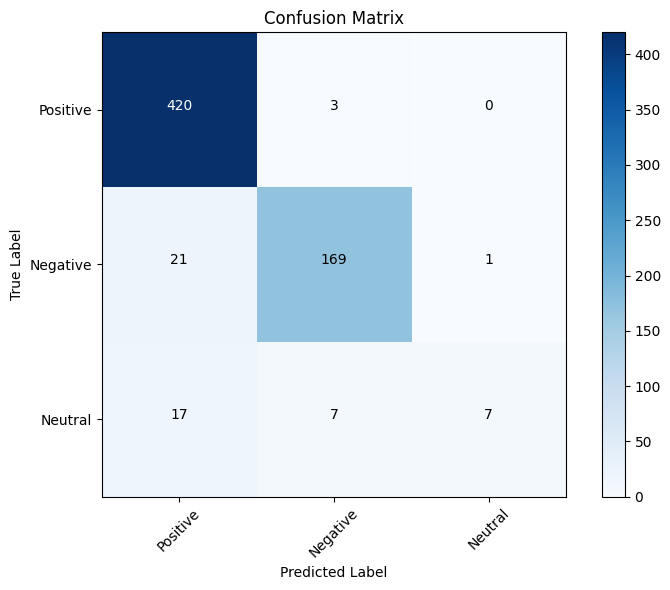

In [ ]:
# Confusion Matrix
cm = confusion_matrix(test_labels, y_pred)
labels = ['Positive', 'Negative', 'Neutral']

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Add labels
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Add values in matrix
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## ADASYN

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]


Distribusi label setelah ADASYN:
Label 0: 1973 data
Label 1: 1892 data
Label 2: 1947 data


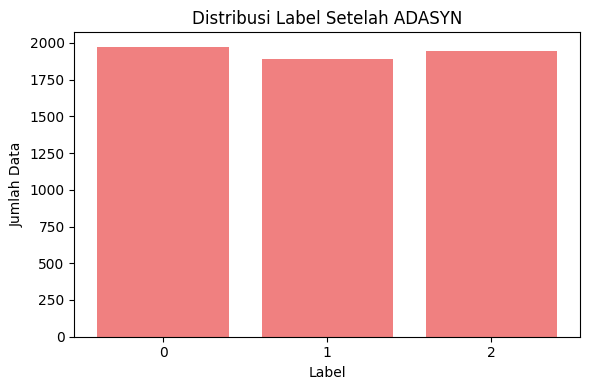

[I 2025-06-09 00:42:21,411] A new study created in memory with name: no-name-94271959-17d3-44ef-a3dc-f96595adf06c


tf_model.h5:   0%|          | 0.00/656M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
182/182 [==============================] - 151s 683ms/step - loss: 0.5349 - accuracy: 0.7896 - val_loss: 0.3119 - val_accuracy: 0.9116
Epoch 2/30
182/182 [==============================] - 121s 665ms/step - loss: 0.3566 - accuracy: 0.8642 - val_loss: 0.2478 - val_accuracy: 0.9178
Epoch 3/30
182/182 [==============================] - 121s 663ms/step - loss: 0.3491 - accuracy: 0.8655 - val_loss: 0.2434 - val_accuracy: 0.9256
Epoch 4/30
182/182 [==============================] - 121s 664ms/step - loss: 0.3481 - accuracy: 0.8651 - val_loss: 0.2935 - val_accuracy: 0.9194
Epoch 5/30
182/182 [==============================] - 122s 669ms/step - loss: 0.3259 - accuracy: 0.8753 - val_loss: 0.3086 - val_accuracy: 0.8667
Epoch 6/30
182/182 [==============================] - 121s 665ms/step - loss: 0.3223 - accuracy: 0.8756 - val_loss: 0.5078 - val_accuracy: 0.8744
Epoch 7/30
182/182 [==============================] - 120s 660ms/step - loss: 0.3082 - accuracy: 0.8790 - val_loss: 0.3100 -

[I 2025-06-09 01:00:23,516] Trial 0 finished with value: 0.7118795831216717 and parameters: {'hidden_dropout_prob': 0.4747687936681009, 'batch_size': 32}. Best is trial 0 with value: 0.7118795831216717.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
182/182 [==============================] - 144s 689ms/step - loss: 0.6384 - accuracy: 0.7192 - val_loss: 0.3551 - val_accuracy: 0.8791
Epoch 2/30
182/182 [==============================] - 121s 664ms/step - loss: 0.3591 - accuracy: 0.8596 - val_loss: 0.2771 - val_accuracy: 0.9039
Epoch 3/30
182/182 [==============================] - 121s 663ms/step - loss: 0.3277 - accuracy: 0.8703 - val_loss: 0.2502 - val_accuracy: 0.9209
Epoch 4/30
182/182 [==============================] - 120s 662ms/step - loss: 0.3155 - accuracy: 0.8825 - val_loss: 0.2714 - val_accuracy: 0.9194
Epoch 5/30
182/182 [==============================] - 121s 664ms/step - loss: 0.2877 - accuracy: 0.8899 - val_loss: 0.2125 - val_accuracy: 0.9318
Epoch 6/30
182/182 [==============================] - 120s 662ms/step - loss: 0.2731 - accuracy: 0.8952 - val_loss: 0.2415 - val_accuracy: 0.9271
Epoch 7/30
182/182 [==============================] - 120s 661ms/step - loss: 0.2790 - accuracy: 0.8950 - val_loss: 0.2673 -

[I 2025-06-09 01:21:45,665] Trial 1 finished with value: 0.7319521067234481 and parameters: {'hidden_dropout_prob': 0.3423622988886833, 'batch_size': 32}. Best is trial 1 with value: 0.7319521067234481.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
182/182 [==============================] - 144s 688ms/step - loss: 0.4987 - accuracy: 0.7983 - val_loss: 0.2475 - val_accuracy: 0.9194
Epoch 2/30
182/182 [==============================] - 121s 662ms/step - loss: 0.3620 - accuracy: 0.8587 - val_loss: 0.2744 - val_accuracy: 0.9039
Epoch 3/30
182/182 [==============================] - 122s 668ms/step - loss: 0.3200 - accuracy: 0.8713 - val_loss: 0.2722 - val_accuracy: 0.9101
Epoch 4/30
182/182 [==============================] - 120s 661ms/step - loss: 0.2991 - accuracy: 0.8883 - val_loss: 0.2593 - val_accuracy: 0.9271
Epoch 5/30
182/182 [==============================] - 122s 669ms/step - loss: 0.2880 - accuracy: 0.8894 - val_loss: 0.2260 - val_accuracy: 0.9302
Epoch 6/30
182/182 [==============================] - 121s 667ms/step - loss: 0.2848 - accuracy: 0.8899 - val_loss: 0.2714 - val_accuracy: 0.9225
Epoch 7/30
182/182 [==============================] - 120s 662ms/step - loss: 0.2675 - accuracy: 0.8959 - val_loss: 0.2616 -

[I 2025-06-09 01:53:34,134] Trial 2 finished with value: 0.8164988076970182 and parameters: {'hidden_dropout_prob': 0.369665093700587, 'batch_size': 32}. Best is trial 2 with value: 0.8164988076970182.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
364/364 [==============================] - 160s 385ms/step - loss: 0.4112 - accuracy: 0.8417 - val_loss: 0.2586 - val_accuracy: 0.9147
Epoch 2/30
364/364 [==============================] - 134s 367ms/step - loss: 0.3249 - accuracy: 0.8801 - val_loss: 0.2166 - val_accuracy: 0.9225
Epoch 3/30
364/364 [==============================] - 134s 367ms/step - loss: 0.2797 - accuracy: 0.8907 - val_loss: 0.2007 - val_accuracy: 0.9240
Epoch 4/30
364/364 [==============================] - 133s 366ms/step - loss: 0.2459 - accuracy: 0.9054 - val_loss: 0.2384 - val_accuracy: 0.9178
Epoch 5/30
364/364 [==============================] - 133s 366ms/step - loss: 0.2163 - accuracy: 0.9188 - val_loss: 0.2280 - val_accuracy: 0.9209
Epoch 6/30
364/364 [==============================] - 133s 365ms/step - loss: 0.1737 - accuracy: 0.9329 - val_loss: 0.3111 - val_accuracy: 0.9225
Epoch 7/30
364/364 [==============================] - 133s 366ms/step - loss: 0.1449 - accuracy: 0.9477 - val_loss: 0.2591 -

[I 2025-06-09 02:12:04,743] Trial 3 finished with value: 0.7297885532280981 and parameters: {'hidden_dropout_prob': 0.2907715599997241, 'batch_size': 16}. Best is trial 2 with value: 0.8164988076970182.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
364/364 [==============================] - 156s 381ms/step - loss: 0.5649 - accuracy: 0.7610 - val_loss: 0.3767 - val_accuracy: 0.8760
Epoch 2/30
364/364 [==============================] - 133s 366ms/step - loss: 0.3743 - accuracy: 0.8603 - val_loss: 0.2917 - val_accuracy: 0.8992
Epoch 3/30
364/364 [==============================] - 133s 366ms/step - loss: 0.3345 - accuracy: 0.8734 - val_loss: 0.2379 - val_accuracy: 0.9147
Epoch 4/30
364/364 [==============================] - 133s 365ms/step - loss: 0.3155 - accuracy: 0.8772 - val_loss: 0.3022 - val_accuracy: 0.9054
Epoch 5/30
364/364 [==============================] - 133s 365ms/step - loss: 0.3105 - accuracy: 0.8789 - val_loss: 0.2696 - val_accuracy: 0.9008
Epoch 6/30
364/364 [==============================] - 133s 365ms/step - loss: 0.2668 - accuracy: 0.8899 - val_loss: 0.2553 - val_accuracy: 0.9163
Epoch 7/30
364/364 [==============================] - 133s 365ms/step - loss: 0.2496 - accuracy: 0.9045 - val_loss: 0.2535 -

[I 2025-06-09 02:30:21,461] Trial 4 finished with value: 0.7084970490742987 and parameters: {'hidden_dropout_prob': 0.45613520139049457, 'batch_size': 16}. Best is trial 2 with value: 0.8164988076970182.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
182/182 [==============================] - 144s 692ms/step - loss: 0.5980 - accuracy: 0.7545 - val_loss: 0.7626 - val_accuracy: 0.7473
Epoch 2/30
182/182 [==============================] - 122s 671ms/step - loss: 0.3991 - accuracy: 0.8453 - val_loss: 0.3962 - val_accuracy: 0.8403
Epoch 3/30
182/182 [==============================] - 122s 669ms/step - loss: 0.3492 - accuracy: 0.8586 - val_loss: 0.3076 - val_accuracy: 0.8884
Epoch 4/30
182/182 [==============================] - 121s 665ms/step - loss: 0.3204 - accuracy: 0.8754 - val_loss: 0.2914 - val_accuracy: 0.9101
Epoch 5/30
182/182 [==============================] - 121s 663ms/step - loss: 0.3120 - accuracy: 0.8756 - val_loss: 0.4726 - val_accuracy: 0.7597
Epoch 6/30
182/182 [==============================] - 121s 665ms/step - loss: 0.2908 - accuracy: 0.8823 - val_loss: 0.2737 - val_accuracy: 0.9054
Epoch 7/30
182/182 [==============================] - 121s 664ms/step - loss: 0.2649 - accuracy: 0.8968 - val_loss: 0.2764 -

[I 2025-06-09 02:58:23,777] Trial 5 finished with value: 0.6758926745411666 and parameters: {'hidden_dropout_prob': 0.21882307821192498, 'batch_size': 32}. Best is trial 2 with value: 0.8164988076970182.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
182/182 [==============================] - 144s 683ms/step - loss: 0.5636 - accuracy: 0.7624 - val_loss: 0.2790 - val_accuracy: 0.8977
Epoch 2/30
182/182 [==============================] - 121s 665ms/step - loss: 0.3358 - accuracy: 0.8651 - val_loss: 0.2328 - val_accuracy: 0.9225
Epoch 3/30
182/182 [==============================] - 121s 663ms/step - loss: 0.3057 - accuracy: 0.8785 - val_loss: 0.3027 - val_accuracy: 0.8961
Epoch 4/30
182/182 [==============================] - 121s 663ms/step - loss: 0.2878 - accuracy: 0.8947 - val_loss: 0.2599 - val_accuracy: 0.9225
Epoch 5/30
182/182 [==============================] - 122s 669ms/step - loss: 0.2446 - accuracy: 0.9057 - val_loss: 0.2555 - val_accuracy: 0.9287
Epoch 6/30
182/182 [==============================] - 121s 666ms/step - loss: 0.2650 - accuracy: 0.8911 - val_loss: 0.2225 - val_accuracy: 0.9256
Epoch 7/30
182/182 [==============================] - 121s 665ms/step - loss: 0.2200 - accuracy: 0.9183 - val_loss: 0.2357 -

[I 2025-06-09 03:21:45,110] Trial 6 finished with value: 0.7371122150099976 and parameters: {'hidden_dropout_prob': 0.22242002124658217, 'batch_size': 32}. Best is trial 2 with value: 0.8164988076970182.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
182/182 [==============================] - 145s 686ms/step - loss: 0.4023 - accuracy: 0.8424 - val_loss: 0.2920 - val_accuracy: 0.9070
Epoch 2/30
182/182 [==============================] - 121s 666ms/step - loss: 0.3346 - accuracy: 0.8649 - val_loss: 0.2892 - val_accuracy: 0.9085
Epoch 3/30
182/182 [==============================] - 121s 665ms/step - loss: 0.2990 - accuracy: 0.8840 - val_loss: 0.2413 - val_accuracy: 0.9178
Epoch 4/30
182/182 [==============================] - 121s 665ms/step - loss: 0.2909 - accuracy: 0.8880 - val_loss: 0.2523 - val_accuracy: 0.9116
Epoch 5/30
182/182 [==============================] - 121s 663ms/step - loss: 0.2837 - accuracy: 0.8944 - val_loss: 0.2920 - val_accuracy: 0.9101
Epoch 6/30
182/182 [==============================] - 120s 661ms/step - loss: 0.2502 - accuracy: 0.9028 - val_loss: 0.2566 - val_accuracy: 0.9271
Epoch 7/30
182/182 [==============================] - 120s 660ms/step - loss: 0.2227 - accuracy: 0.9141 - val_loss: 0.2518 -

[I 2025-06-09 03:39:48,952] Trial 7 finished with value: 0.770517883370548 and parameters: {'hidden_dropout_prob': 0.2307794265166536, 'batch_size': 32}. Best is trial 2 with value: 0.8164988076970182.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
182/182 [==============================] - 144s 686ms/step - loss: 0.4802 - accuracy: 0.8095 - val_loss: 0.3045 - val_accuracy: 0.9116
Epoch 2/30
182/182 [==============================] - 121s 664ms/step - loss: 0.3331 - accuracy: 0.8753 - val_loss: 0.2416 - val_accuracy: 0.9240
Epoch 3/30
182/182 [==============================] - 120s 661ms/step - loss: 0.3420 - accuracy: 0.8665 - val_loss: 0.2840 - val_accuracy: 0.9147
Epoch 4/30
182/182 [==============================] - 120s 662ms/step - loss: 0.3168 - accuracy: 0.8785 - val_loss: 0.3131 - val_accuracy: 0.9209
Epoch 5/30
182/182 [==============================] - 121s 663ms/step - loss: 0.3068 - accuracy: 0.8832 - val_loss: 0.2243 - val_accuracy: 0.9318
Epoch 6/30
182/182 [==============================] - 120s 660ms/step - loss: 0.2825 - accuracy: 0.8933 - val_loss: 0.2352 - val_accuracy: 0.9302
Epoch 7/30
182/182 [==============================] - 120s 662ms/step - loss: 0.2804 - accuracy: 0.8919 - val_loss: 0.3594 -

[I 2025-06-09 04:09:11,241] Trial 8 finished with value: 0.7864441113862893 and parameters: {'hidden_dropout_prob': 0.3836776963564593, 'batch_size': 32}. Best is trial 2 with value: 0.8164988076970182.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
182/182 [==============================] - 145s 693ms/step - loss: 0.4485 - accuracy: 0.8269 - val_loss: 0.2955 - val_accuracy: 0.9070
Epoch 2/30
182/182 [==============================] - 121s 666ms/step - loss: 0.3422 - accuracy: 0.8651 - val_loss: 0.2842 - val_accuracy: 0.9101
Epoch 3/30
182/182 [==============================] - 122s 669ms/step - loss: 0.3234 - accuracy: 0.8734 - val_loss: 0.2678 - val_accuracy: 0.9085
Epoch 4/30
182/182 [==============================] - 122s 671ms/step - loss: 0.2902 - accuracy: 0.8854 - val_loss: 0.2460 - val_accuracy: 0.9178
Epoch 5/30
182/182 [==============================] - 122s 668ms/step - loss: 0.2719 - accuracy: 0.8952 - val_loss: 0.2490 - val_accuracy: 0.9225
Epoch 6/30
182/182 [==============================] - 121s 665ms/step - loss: 0.2378 - accuracy: 0.9104 - val_loss: 0.2070 - val_accuracy: 0.9364
Epoch 7/30
182/182 [==============================] - 121s 662ms/step - loss: 0.2172 - accuracy: 0.9136 - val_loss: 0.2454 -

[I 2025-06-09 04:33:20,841] Trial 9 finished with value: 0.7911094194703185 and parameters: {'hidden_dropout_prob': 0.28835348401685823, 'batch_size': 32}. Best is trial 2 with value: 0.8164988076970182.


Best hyperparameters: {'hidden_dropout_prob': 0.369665093700587, 'batch_size': 32}


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
182/182 [==============================] - ETA: 0s - loss: 0.6141 - accuracy: 0.7354
Epoch 1: val_loss improved from inf to 0.40145, saving model to model/checkpoint-01
182/182 [==============================] - 206s 1s/step - loss: 0.6141 - accuracy: 0.7354 - val_loss: 0.4015 - val_accuracy: 0.8961
Epoch 2/30
182/182 [==============================] - ETA: 0s - loss: 0.3710 - accuracy: 0.8539
Epoch 2: val_loss improved from 0.40145 to 0.23428, saving model to model/checkpoint-02
182/182 [==============================] - 192s 1s/step - loss: 0.3710 - accuracy: 0.8539 - val_loss: 0.2343 - val_accuracy: 0.9271
Epoch 3/30
182/182 [==============================] - ETA: 0s - loss: 0.3312 - accuracy: 0.8699
Epoch 3: val_loss did not improve from 0.23428
182/182 [==============================] - 121s 667ms/step - loss: 0.3312 - accuracy: 0.8699 - val_loss: 0.2729 - val_accuracy: 0.9132
Epoch 4/30
182/182 [==============================] - ETA: 0s - loss: 0.3351 - accuracy: 0.869

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, AutoConfig, AdamWeightDecay
from imblearn.over_sampling import ADASYN
from sklearn.metrics import f1_score, classification_report
from collections import Counter
import numpy as np
import optuna

SEED = 42

# Set seed
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

# Prepare texts and labels
train_texts = df_train['text']
train_labels = df_train['label']
val_texts = df_val['text']
val_labels = df_val['label']
test_texts = df_test['text']
test_labels = df_test['label']

# Tokenize training data (for ADASYN, use NumPy)
train_encodings_np = tokenizer(list(train_texts), truncation=True, padding=True, max_length=256, return_tensors='np')
train_labels_np = np.array(train_labels)

# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(train_encodings_np['input_ids'], train_labels_np)

# Convert to TensorFlow tensors
train_encodings_resampled = {
    'input_ids': tf.constant(X_resampled),
    'attention_mask': tf.ones_like(X_resampled, dtype=tf.int32)
}

# Print distribution of resampled labels
label_counts = Counter(y_resampled)
print("\nDistribusi label setelah ADASYN:")
for label, count in label_counts.items():
    print(f"Label {label}: {count} data")

# Optional: plot
plt.figure(figsize=(6, 4))
plt.bar(label_counts.keys(), label_counts.values(), color='lightcoral')
plt.xlabel("Label")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Label Setelah ADASYN")
plt.xticks(list(label_counts.keys()))
plt.tight_layout()
plt.show()

# Tokenize val and test data
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=256, return_tensors='tf')
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=256, return_tensors='tf')
val_labels_np = np.array(val_labels)

# Early stopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, mode='min', restore_best_weights=True
)

def create_model(trial):
    hidden_dropout_prob = trial.suggest_float("hidden_dropout_prob", 0.1, 0.5)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    config = AutoConfig.from_pretrained(
        "indobenchmark/indobert-base-p1",
        num_labels=3,
        hidden_dropout_prob=hidden_dropout_prob,
    )

    model = TFAutoModelForSequenceClassification.from_pretrained(
        "indobenchmark/indobert-base-p1",
        config=config,
    )

    optimizer = AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.05)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model, batch_size

def objective(trial):
    model, batch_size = create_model(trial)

    train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels_np)).shuffle(1000, seed=SEED).batch(batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_np)).shuffle(1000, seed=SEED).batch(batch_size)

    model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=30,
        callbacks=[early_stopping_callback],
        verbose=1
    )

    val_logits = model.predict(val_dataset).logits
    val_preds = np.argmax(val_logits, axis=1)
    f1 = f1_score(val_labels_np, val_preds, average='macro')

    return f1

# Run Optuna
sampler = optuna.samplers.TPESampler(seed=SEED)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=10)

print("Best hyperparameters:", study.best_params)

# Final training with best trial
best_model, best_batch_size = create_model(study.best_trial)

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings_resampled), y_resampled)).shuffle(1000).batch(best_batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_np)).batch(best_batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels)).batch(best_batch_size)

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model/checkpoint-{epoch:02d}',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    verbose=1
)

# ✅ Simpan hasil training
history = best_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30,
    callbacks=[checkpoint_callback, early_stopping_callback],
    verbose=1
)

# Save model
best_model.save_pretrained("model")
tokenizer.save_pretrained("model")

# Final evaluation
test_logits = best_model.predict(test_dataset).logits
test_preds = np.argmax(test_logits, axis=1)

print("\nFinal Test Classification Report:")
print(classification_report(test_labels, test_preds, digits=4))


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    balanced_accuracy_score
)
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Load the saved model and tokenizer using os.path.join
model_dir = os.path.join("model")
model = TFAutoModelForSequenceClassification.from_pretrained(model_dir)
tokenizer = AutoTokenizer.from_pretrained(model_dir)

# Tokenize test data
test_encodings = tokenizer(
    list(test_texts),
    truncation=True,
    padding=True,
    max_length=256,
    return_tensors='tf'
)

# Get predictions
logits = model.predict(dict(test_encodings)).logits
y_pred = np.argmax(logits, axis=1)

# Calculate metrics
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred, average='macro')
recall = recall_score(test_labels, y_pred, average='macro')
f1 = f1_score(test_labels, y_pred, average='macro')
balanced_accuracy = balanced_accuracy_score(test_labels, y_pred)

# Print results
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(test_labels, y_pred, target_names=['Positive', 'Negative', 'Neutral']))

Some layers from the model checkpoint at model were not used when initializing TFBertForSequenceClassification: ['dropout_417']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


21/21 [==============================] - 8s 198ms/step

Model Evaluation Metrics:
Accuracy: 0.9349
Balanced Accuracy: 0.7281
Precision: 0.8411
Recall: 0.7281
F1-Score: 0.7543

Detailed Classification Report:
              precision    recall  f1-score   support

    Positive       0.96      0.98      0.97       423
    Negative       0.90      0.95      0.92       191
     Neutral       0.67      0.26      0.37        31

    accuracy                           0.93       645
   macro avg       0.84      0.73      0.75       645
weighted avg       0.93      0.93      0.93       645



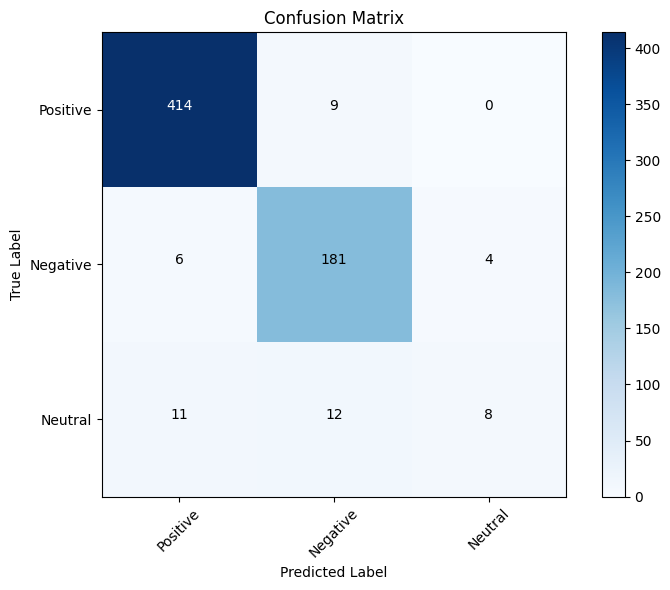

In [ ]:
# Confusion Matrix
cm = confusion_matrix(test_labels, y_pred)
labels = ['Positive', 'Negative', 'Neutral']

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Add labels
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Add values in matrix
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## SMOTE


Distribusi label setelah SMOTE:
Label 0: 1973 data
Label 1: 1973 data
Label 2: 1973 data


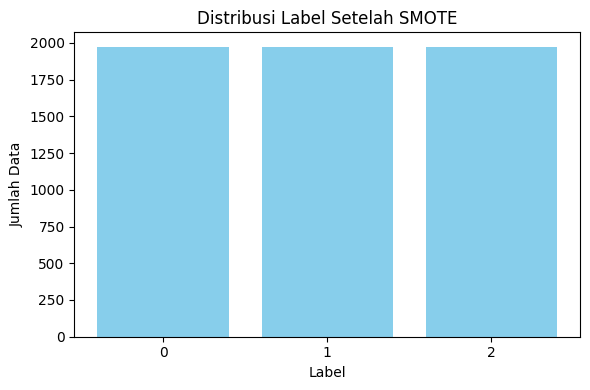

[I 2025-06-09 05:09:24,685] A new study created in memory with name: no-name-b7df656c-969d-49ff-8fb8-c9db81d8779d
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
370/370 [==============================] - 160s 378ms/step - loss: 0.6018 - accuracy: 0.7488 - val_loss: 0.4870 - val_accuracy: 0.8217
Epoch 2/30
370/370 [==============================] - 135s 365ms/step - loss: 0.4213 - accuracy: 0.8351 - val_loss: 0.4929 - val_accuracy: 0.7721
Epoch 3/30
370/370 [==============================] - 135s 366ms/step - loss: 0.3676 - accuracy: 0.8583 - val_loss: 0.3496 - val_accuracy: 0.8775
Epoch 4/30
370/370 [==============================] - 135s 365ms/step - loss: 0.3440 - accuracy: 0.8628 - val_loss: 0.3804 - val_accuracy: 0.8543
Epoch 5/30
370/370 [==============================] - 135s 366ms/step - loss: 0.3326 - accuracy: 0.8630 - val_loss: 0.2649 - val_accuracy: 0.9147
Epoch 6/30
370/370 [==============================] - 135s 365ms/step - loss: 0.3055 - accuracy: 0.8750 - val_loss: 0.2383 - val_accuracy: 0.9194
Epoch 7/30
370/370 [==============================] - 135s 365ms/step - loss: 0.2684 - accuracy: 0.8934 - val_loss: 0.2633 -

[I 2025-06-09 05:35:00,786] Trial 0 finished with value: 0.696553965245554 and parameters: {'hidden_dropout_prob': 0.46270180697064, 'batch_size': 16}. Best is trial 0 with value: 0.696553965245554.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
370/370 [==============================] - 157s 378ms/step - loss: 0.4542 - accuracy: 0.8191 - val_loss: 0.3207 - val_accuracy: 0.8899
Epoch 2/30
370/370 [==============================] - 136s 369ms/step - loss: 0.3235 - accuracy: 0.8699 - val_loss: 0.2547 - val_accuracy: 0.9163
Epoch 3/30
370/370 [==============================] - 136s 368ms/step - loss: 0.2786 - accuracy: 0.8905 - val_loss: 0.2314 - val_accuracy: 0.9116
Epoch 4/30
370/370 [==============================] - 136s 368ms/step - loss: 0.2497 - accuracy: 0.9023 - val_loss: 0.2783 - val_accuracy: 0.9116
Epoch 5/30
370/370 [==============================] - 136s 367ms/step - loss: 0.2193 - accuracy: 0.9177 - val_loss: 0.2743 - val_accuracy: 0.9070
Epoch 6/30
370/370 [==============================] - 136s 369ms/step - loss: 0.1926 - accuracy: 0.9279 - val_loss: 0.2829 - val_accuracy: 0.9240
Epoch 7/30
370/370 [==============================] - 136s 367ms/step - loss: 0.1607 - accuracy: 0.9415 - val_loss: 0.3000 -

[I 2025-06-09 05:53:39,972] Trial 1 finished with value: 0.7485860366995981 and parameters: {'hidden_dropout_prob': 0.27135247350258107, 'batch_size': 16}. Best is trial 1 with value: 0.7485860366995981.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
185/185 [==============================] - 147s 688ms/step - loss: 0.6156 - accuracy: 0.7417 - val_loss: 0.3667 - val_accuracy: 0.8698
Epoch 2/30
185/185 [==============================] - 124s 669ms/step - loss: 0.3576 - accuracy: 0.8583 - val_loss: 0.2478 - val_accuracy: 0.9194
Epoch 3/30
185/185 [==============================] - 124s 668ms/step - loss: 0.3231 - accuracy: 0.8709 - val_loss: 0.2365 - val_accuracy: 0.9209
Epoch 4/30
185/185 [==============================] - 122s 662ms/step - loss: 0.3288 - accuracy: 0.8723 - val_loss: 0.2668 - val_accuracy: 0.9178
Epoch 5/30
185/185 [==============================] - 124s 668ms/step - loss: 0.2990 - accuracy: 0.8860 - val_loss: 0.2150 - val_accuracy: 0.9225
Epoch 6/30
185/185 [==============================] - 123s 664ms/step - loss: 0.2915 - accuracy: 0.8863 - val_loss: 0.2146 - val_accuracy: 0.9302
Epoch 7/30
185/185 [==============================] - 122s 662ms/step - loss: 0.2570 - accuracy: 0.9002 - val_loss: 0.2348 -

[I 2025-06-09 06:24:09,658] Trial 2 finished with value: 0.8044195395716279 and parameters: {'hidden_dropout_prob': 0.4327709157958807, 'batch_size': 32}. Best is trial 2 with value: 0.8044195395716279.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
93/93 [==============================] - 143s 1s/step - loss: 0.6146 - accuracy: 0.7412 - val_loss: 0.3369 - val_accuracy: 0.8791
Epoch 2/30
93/93 [==============================] - 116s 1s/step - loss: 0.3907 - accuracy: 0.8515 - val_loss: 0.3968 - val_accuracy: 0.7349
Epoch 3/30
93/93 [==============================] - 115s 1s/step - loss: 0.3669 - accuracy: 0.8571 - val_loss: 0.3804 - val_accuracy: 0.7814
Epoch 4/30
93/93 [==============================] - 116s 1s/step - loss: 0.3556 - accuracy: 0.8615 - val_loss: 0.3250 - val_accuracy: 0.8806
Epoch 5/30
93/93 [==============================] - 116s 1s/step - loss: 0.3410 - accuracy: 0.8670 - val_loss: 0.2408 - val_accuracy: 0.9209
Epoch 6/30
93/93 [==============================] - 116s 1s/step - loss: 0.3140 - accuracy: 0.8757 - val_loss: 0.2644 - val_accuracy: 0.9163
Epoch 7/30
93/93 [==============================] - 116s 1s/step - loss: 0.3213 - accuracy: 0.8735 - val_loss: 0.2739 - val_accuracy: 0.9132
Epoch 8/30
93

[I 2025-06-09 06:46:15,097] Trial 3 finished with value: 0.7315898781220965 and parameters: {'hidden_dropout_prob': 0.2779035482191051, 'batch_size': 64}. Best is trial 2 with value: 0.8044195395716279.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
93/93 [==============================] - 137s 1s/step - loss: 0.5378 - accuracy: 0.7834 - val_loss: 0.3538 - val_accuracy: 0.8481
Epoch 2/30
93/93 [==============================] - 116s 1s/step - loss: 0.3761 - accuracy: 0.8643 - val_loss: 0.3370 - val_accuracy: 0.8713
Epoch 3/30
93/93 [==============================] - 116s 1s/step - loss: 0.3342 - accuracy: 0.8787 - val_loss: 0.2525 - val_accuracy: 0.9163
Epoch 4/30
93/93 [==============================] - 115s 1s/step - loss: 0.3284 - accuracy: 0.8730 - val_loss: 0.2723 - val_accuracy: 0.9240
Epoch 5/30
93/93 [==============================] - 116s 1s/step - loss: 0.2983 - accuracy: 0.8855 - val_loss: 0.2606 - val_accuracy: 0.9256
Epoch 6/30
93/93 [==============================] - 115s 1s/step - loss: 0.2883 - accuracy: 0.8833 - val_loss: 0.3342 - val_accuracy: 0.8899
Epoch 7/30
93/93 [==============================] - 117s 1s/step - loss: 0.2642 - accuracy: 0.9047 - val_loss: 0.2497 - val_accuracy: 0.9395
Epoch 8/30
93

[I 2025-06-09 07:11:13,515] Trial 4 finished with value: 0.8164638790538659 and parameters: {'hidden_dropout_prob': 0.10621411470718348, 'batch_size': 64}. Best is trial 4 with value: 0.8164638790538659.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
93/93 [==============================] - 140s 1s/step - loss: 0.6033 - accuracy: 0.7528 - val_loss: 0.4115 - val_accuracy: 0.8558
Epoch 2/30
93/93 [==============================] - 116s 1s/step - loss: 0.4064 - accuracy: 0.8498 - val_loss: 0.3849 - val_accuracy: 0.7690
Epoch 3/30
93/93 [==============================] - 117s 1s/step - loss: 0.3702 - accuracy: 0.8604 - val_loss: 0.3988 - val_accuracy: 0.8450
Epoch 4/30
93/93 [==============================] - 115s 1s/step - loss: 0.3451 - accuracy: 0.8728 - val_loss: 0.2422 - val_accuracy: 0.9240
Epoch 5/30
93/93 [==============================] - 115s 1s/step - loss: 0.3281 - accuracy: 0.8724 - val_loss: 0.2545 - val_accuracy: 0.9271
Epoch 6/30
93/93 [==============================] - 115s 1s/step - loss: 0.3380 - accuracy: 0.8689 - val_loss: 0.6367 - val_accuracy: 0.6806
Epoch 7/30
93/93 [==============================] - 116s 1s/step - loss: 0.3500 - accuracy: 0.8642 - val_loss: 0.3882 - val_accuracy: 0.8326
Epoch 8/30
93

[I 2025-06-09 07:30:00,209] Trial 5 finished with value: 0.7212460949435053 and parameters: {'hidden_dropout_prob': 0.33734976728639676, 'batch_size': 64}. Best is trial 4 with value: 0.8164638790538659.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
93/93 [==============================] - 141s 1s/step - loss: 0.6195 - accuracy: 0.7380 - val_loss: 0.3685 - val_accuracy: 0.8946
Epoch 2/30
93/93 [==============================] - 116s 1s/step - loss: 0.3972 - accuracy: 0.8542 - val_loss: 0.5835 - val_accuracy: 0.6884
Epoch 3/30
93/93 [==============================] - 116s 1s/step - loss: 0.3614 - accuracy: 0.8665 - val_loss: 0.2789 - val_accuracy: 0.9194
Epoch 4/30
93/93 [==============================] - 116s 1s/step - loss: 0.3375 - accuracy: 0.8711 - val_loss: 0.4599 - val_accuracy: 0.7876
Epoch 5/30
93/93 [==============================] - 116s 1s/step - loss: 0.3335 - accuracy: 0.8716 - val_loss: 0.2535 - val_accuracy: 0.9271
Epoch 6/30
93/93 [==============================] - 116s 1s/step - loss: 0.3182 - accuracy: 0.8770 - val_loss: 0.2233 - val_accuracy: 0.9287
Epoch 7/30
93/93 [==============================] - 115s 1s/step - loss: 0.3041 - accuracy: 0.8794 - val_loss: 0.3040 - val_accuracy: 0.9209
Epoch 8/30
93

[I 2025-06-09 07:58:25,944] Trial 6 finished with value: 0.790979456005595 and parameters: {'hidden_dropout_prob': 0.21944592139277763, 'batch_size': 64}. Best is trial 4 with value: 0.8164638790538659.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
370/370 [==============================] - 158s 377ms/step - loss: 0.5261 - accuracy: 0.7859 - val_loss: 0.2830 - val_accuracy: 0.9132
Epoch 2/30
370/370 [==============================] - 136s 369ms/step - loss: 0.3485 - accuracy: 0.8652 - val_loss: 0.1924 - val_accuracy: 0.9302
Epoch 3/30
370/370 [==============================] - 136s 366ms/step - loss: 0.3030 - accuracy: 0.8821 - val_loss: 0.2107 - val_accuracy: 0.9302
Epoch 4/30
370/370 [==============================] - 136s 367ms/step - loss: 0.2813 - accuracy: 0.8932 - val_loss: 0.2276 - val_accuracy: 0.9240
Epoch 5/30
370/370 [==============================] - 136s 366ms/step - loss: 0.2598 - accuracy: 0.8985 - val_loss: 0.2087 - val_accuracy: 0.9364
Epoch 6/30
370/370 [==============================] - 136s 368ms/step - loss: 0.2368 - accuracy: 0.9086 - val_loss: 0.2107 - val_accuracy: 0.9302
Epoch 7/30
41/41 [==============================] - 9s 110ms/step


[I 2025-06-09 08:15:05,646] Trial 7 finished with value: 0.7304682182204241 and parameters: {'hidden_dropout_prob': 0.4019737829937632, 'batch_size': 16}. Best is trial 4 with value: 0.8164638790538659.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
185/185 [==============================] - 145s 688ms/step - loss: 0.5953 - accuracy: 0.7442 - val_loss: 0.3281 - val_accuracy: 0.8977
Epoch 2/30
185/185 [==============================] - 124s 668ms/step - loss: 0.3572 - accuracy: 0.8625 - val_loss: 0.3842 - val_accuracy: 0.8822
Epoch 3/30
185/185 [==============================] - 123s 666ms/step - loss: 0.3220 - accuracy: 0.8782 - val_loss: 0.2344 - val_accuracy: 0.9240
Epoch 4/30
185/185 [==============================] - 124s 668ms/step - loss: 0.3091 - accuracy: 0.8765 - val_loss: 0.2369 - val_accuracy: 0.9209
Epoch 5/30
185/185 [==============================] - 123s 664ms/step - loss: 0.2884 - accuracy: 0.8887 - val_loss: 0.2813 - val_accuracy: 0.9225
Epoch 6/30
185/185 [==============================] - 123s 665ms/step - loss: 0.2571 - accuracy: 0.8976 - val_loss: 0.2847 - val_accuracy: 0.9194
Epoch 7/30
185/185 [==============================] - 123s 667ms/step - loss: 0.2585 - accuracy: 0.8931 - val_loss: 0.2528 -

[I 2025-06-09 08:32:54,307] Trial 8 finished with value: 0.7075169689939553 and parameters: {'hidden_dropout_prob': 0.3372963172543453, 'batch_size': 32}. Best is trial 4 with value: 0.8164638790538659.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
93/93 [==============================] - 141s 1s/step - loss: 0.7248 - accuracy: 0.6832 - val_loss: 0.5995 - val_accuracy: 0.8295
Epoch 2/30
93/93 [==============================] - 116s 1s/step - loss: 0.4487 - accuracy: 0.8351 - val_loss: 0.3472 - val_accuracy: 0.8868
Epoch 3/30
93/93 [==============================] - 115s 1s/step - loss: 0.4049 - accuracy: 0.8520 - val_loss: 0.3865 - val_accuracy: 0.8047
Epoch 4/30
93/93 [==============================] - 115s 1s/step - loss: 0.3895 - accuracy: 0.8552 - val_loss: 0.3274 - val_accuracy: 0.9147
Epoch 5/30
93/93 [==============================] - 115s 1s/step - loss: 0.4068 - accuracy: 0.8451 - val_loss: 0.3592 - val_accuracy: 0.8775
Epoch 6/30
93/93 [==============================] - 116s 1s/step - loss: 0.3527 - accuracy: 0.8637 - val_loss: 0.3102 - val_accuracy: 0.9070
Epoch 7/30
93/93 [==============================] - 116s 1s/step - loss: 0.3680 - accuracy: 0.8601 - val_loss: 0.4295 - val_accuracy: 0.7209
Epoch 8/30
93

[I 2025-06-09 08:56:24,779] Trial 9 finished with value: 0.7301685767812924 and parameters: {'hidden_dropout_prob': 0.44548699645922807, 'batch_size': 64}. Best is trial 4 with value: 0.8164638790538659.


Best hyperparameters: {'hidden_dropout_prob': 0.10621411470718348, 'batch_size': 64}


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
93/93 [==============================] - ETA: 0s - loss: 0.5585 - accuracy: 0.7745
Epoch 1: val_loss improved from inf to 0.40774, saving model to model/checkpoint-01
93/93 [==============================] - 258s 3s/step - loss: 0.5585 - accuracy: 0.7745 - val_loss: 0.4077 - val_accuracy: 0.8264
Epoch 2/30
93/93 [==============================] - ETA: 0s - loss: 0.3807 - accuracy: 0.8577
Epoch 2: val_loss did not improve from 0.40774
93/93 [==============================] - 116s 1s/step - loss: 0.3807 - accuracy: 0.8577 - val_loss: 0.4175 - val_accuracy: 0.6760
Epoch 3/30
93/93 [==============================] - ETA: 0s - loss: 0.3525 - accuracy: 0.8721
Epoch 3: val_loss improved from 0.40774 to 0.29896, saving model to model/checkpoint-03
93/93 [==============================] - 251s 3s/step - loss: 0.3525 - accuracy: 0.8721 - val_loss: 0.2990 - val_accuracy: 0.8930
Epoch 4/30
93/93 [==============================] - ETA: 0s - loss: 0.3565 - accuracy: 0.8633
Epoch 4: val_lo

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, AutoConfig, AdamWeightDecay
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, classification_report
from collections import Counter
import numpy as np
import optuna
import random
import os

SEED = 42  # kamu bisa ganti sesuai kebutuhan

# Set seed untuk reproducibility
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)


# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

# Prepare texts and labels
train_texts = df_train['text']
train_labels = df_train['label']
val_texts = df_val['text']
val_labels = df_val['label']
test_texts = df_test['text']
test_labels = df_test['label']

# Tokenize training data (for SMOTE, use NumPy)
train_encodings_np = tokenizer(list(train_texts), truncation=True, padding=True, max_length=256, return_tensors='np')
train_labels_np = np.array(train_labels)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(train_encodings_np['input_ids'], train_labels_np)

# Convert to TensorFlow tensors
train_encodings_resampled = {
    'input_ids': tf.constant(X_resampled),
    'attention_mask': tf.ones_like(X_resampled, dtype=tf.int32)
}

# Print distribution of resampled labels
label_counts = Counter(y_resampled)
print("\nDistribusi label setelah SMOTE:")
for label, count in label_counts.items():
    print(f"Label {label}: {count} data")

# Optional: plot
plt.figure(figsize=(6, 4))
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.xlabel("Label")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Label Setelah SMOTE")
plt.xticks(list(label_counts.keys()))
plt.tight_layout()
plt.show()

# Tokenize val and test data
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=256, return_tensors='tf')
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=256, return_tensors='tf')
val_labels_np = np.array(val_labels)

# Early stopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, mode='min', restore_best_weights=True
)

def create_model(trial):
    hidden_dropout_prob = trial.suggest_float("hidden_dropout_prob", 0.1, 0.5)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    config = AutoConfig.from_pretrained(
        "indobenchmark/indobert-base-p1",
        num_labels=3,
        hidden_dropout_prob=hidden_dropout_prob,
    )

    model = TFAutoModelForSequenceClassification.from_pretrained(
        "indobenchmark/indobert-base-p1",
        config=config,
    )

    optimizer = AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.05)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model, batch_size

def objective(trial):
    model, batch_size = create_model(trial)

    train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings_resampled), y_resampled)).shuffle(1000).batch(batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_np)).batch(batch_size)

    model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=30,
        callbacks=[early_stopping_callback],
        verbose=1
    )

    val_logits = model.predict(val_dataset).logits
    val_preds = np.argmax(val_logits, axis=1)
    f1 = f1_score(val_labels_np, val_preds, average='macro')

    return f1

# Run Optuna
sampler = optuna.samplers.TPESampler(seed=SEED)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=10)

print("Best hyperparameters:", study.best_params)

# Final training with best trial
best_model, best_batch_size = create_model(study.best_trial)

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings_resampled), y_resampled)).shuffle(1000).batch(best_batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_np)).batch(best_batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels)).batch(best_batch_size)

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model/checkpoint-{epoch:02d}',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    verbose=1
)

# ✅ Simpan hasil training
history = best_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30,
    callbacks=[checkpoint_callback, early_stopping_callback],
    verbose=1
)

# Save model
best_model.save_pretrained("model")
tokenizer.save_pretrained("model")

# Final evaluation
test_logits = best_model.predict(test_dataset).logits
test_preds = np.argmax(test_logits, axis=1)

print("\nFinal Test Classification Report:")
print(classification_report(test_labels, test_preds, digits=4))


In [ ]:
# Save final model and tokenizer
best_model.save_pretrained("model")
tokenizer.save_pretrained("model")

('model/tokenizer_config.json',
 'model/special_tokens_map.json',
 'model/vocab.txt',
 'model/added_tokens.json',
 'model/tokenizer.json')

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    balanced_accuracy_score
)
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Load the saved model and tokenizer using os.path.join
model_dir = os.path.join("model")
model = TFAutoModelForSequenceClassification.from_pretrained(model_dir)
tokenizer = AutoTokenizer.from_pretrained(model_dir)

# Tokenize test data
test_encodings = tokenizer(
    list(test_texts),
    truncation=True,
    padding=True,
    max_length=256,
    return_tensors='tf'
)

# Get predictions
logits = model.predict(dict(test_encodings)).logits
y_pred = np.argmax(logits, axis=1)

# Calculate metrics
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred, average='macro')
recall = recall_score(test_labels, y_pred, average='macro')
f1 = f1_score(test_labels, y_pred, average='macro')
balanced_accuracy = balanced_accuracy_score(test_labels, y_pred)

# Print results
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(test_labels, y_pred, target_names=['Positive', 'Negative', 'Neutral']))

Some layers from the model checkpoint at model were not used when initializing TFBertForSequenceClassification: ['dropout_873']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


21/21 [==============================] - 10s 187ms/step

Model Evaluation Metrics:
Accuracy: 0.9163
Balanced Accuracy: 0.7413
Precision: 0.7500
Recall: 0.7413
F1-Score: 0.7451

Detailed Classification Report:
              precision    recall  f1-score   support

    Positive       0.95      0.98      0.97       423
    Negative       0.92      0.85      0.89       191
     Neutral       0.38      0.39      0.38        31

    accuracy                           0.92       645
   macro avg       0.75      0.74      0.75       645
weighted avg       0.92      0.92      0.92       645



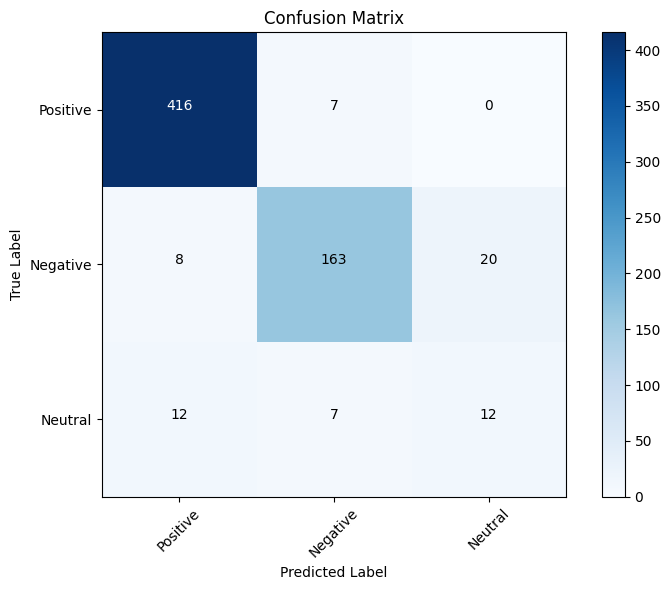

In [ ]:
# Confusion Matrix
cm = confusion_matrix(test_labels, y_pred)
labels = ['Positive', 'Negative', 'Neutral']

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Add labels
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Add values in matrix
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## K-Means SMOTE

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]


Distribusi label setelah KMeans SMOTE:
Label 0: 1973 data
Label 1: 1980 data
Label 2: 1980 data


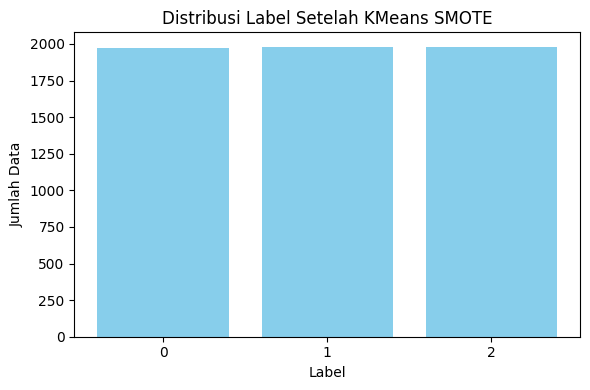

[I 2025-06-10 01:44:42,131] A new study created in memory with name: no-name-18572c02-8eab-4fd6-aa48-97d8f31dccd8


tf_model.h5:   0%|          | 0.00/656M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
186/186 [==============================] - 199s 733ms/step - loss: 0.6078 - accuracy: 0.7450 - val_loss: 0.4050 - val_accuracy: 0.8729
Epoch 2/30
186/186 [==============================] - 134s 719ms/step - loss: 0.3844 - accuracy: 0.8522 - val_loss: 0.2780 - val_accuracy: 0.9101
Epoch 3/30
186/186 [==============================] - 133s 717ms/step - loss: 0.3486 - accuracy: 0.8623 - val_loss: 0.2401 - val_accuracy: 0.9256
Epoch 4/30
186/186 [==============================] - 134s 718ms/step - loss: 0.3185 - accuracy: 0.8773 - val_loss: 0.2298 - val_accuracy: 0.9225
Epoch 5/30
186/186 [==============================] - 133s 714ms/step - loss: 0.3046 - accuracy: 0.8862 - val_loss: 0.2436 - val_accuracy: 0.9225
Epoch 6/30
186/186 [==============================] - 134s 720ms/step - loss: 0.2937 - accuracy: 0.8936 - val_loss: 0.2293 - val_accuracy: 0.9240
Epoch 7/30
186/186 [==============================] - 133s 716ms/step - loss: 0.3096 - accuracy: 0.8788 - val_loss: 0.2290 -

[I 2025-06-10 02:15:36,960] Trial 0 finished with value: 0.7950549333528057 and parameters: {'hidden_dropout_prob': 0.46586650504195504, 'batch_size': 32}. Best is trial 0 with value: 0.7950549333528057.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
371/371 [==============================] - 165s 396ms/step - loss: 0.4115 - accuracy: 0.8382 - val_loss: 0.2288 - val_accuracy: 0.9318
Epoch 2/30
371/371 [==============================] - 143s 386ms/step - loss: 0.3096 - accuracy: 0.8805 - val_loss: 0.2093 - val_accuracy: 0.9271
Epoch 3/30
371/371 [==============================] - 142s 384ms/step - loss: 0.2840 - accuracy: 0.8909 - val_loss: 0.2117 - val_accuracy: 0.9333
Epoch 4/30
371/371 [==============================] - 143s 385ms/step - loss: 0.2450 - accuracy: 0.9080 - val_loss: 0.3139 - val_accuracy: 0.9240
Epoch 5/30
371/371 [==============================] - 143s 385ms/step - loss: 0.2238 - accuracy: 0.9145 - val_loss: 0.2858 - val_accuracy: 0.9256
Epoch 6/30
371/371 [==============================] - 143s 386ms/step - loss: 0.1854 - accuracy: 0.9302 - val_loss: 0.2348 - val_accuracy: 0.9287
Epoch 7/30
41/41 [==============================] - 7s 112ms/step


[I 2025-06-10 02:37:40,727] Trial 1 finished with value: 0.7117500419255148 and parameters: {'hidden_dropout_prob': 0.35310010460569596, 'batch_size': 16}. Best is trial 0 with value: 0.7950549333528057.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
371/371 [==============================] - 166s 398ms/step - loss: 0.4832 - accuracy: 0.8097 - val_loss: 0.2409 - val_accuracy: 0.9271
Epoch 2/30
371/371 [==============================] - 144s 387ms/step - loss: 0.3013 - accuracy: 0.8869 - val_loss: 0.2293 - val_accuracy: 0.9225
Epoch 3/30
371/371 [==============================] - 143s 386ms/step - loss: 0.2541 - accuracy: 0.9012 - val_loss: 0.2649 - val_accuracy: 0.9163
Epoch 4/30
371/371 [==============================] - 142s 384ms/step - loss: 0.2211 - accuracy: 0.9171 - val_loss: 0.2027 - val_accuracy: 0.9256
Epoch 5/30
371/371 [==============================] - 144s 387ms/step - loss: 0.1821 - accuracy: 0.9341 - val_loss: 0.2465 - val_accuracy: 0.9085
Epoch 6/30
371/371 [==============================] - 144s 387ms/step - loss: 0.1460 - accuracy: 0.9477 - val_loss: 0.2507 - val_accuracy: 0.9271
Epoch 7/30
371/371 [==============================] - 143s 386ms/step - loss: 0.1093 - accuracy: 0.9597 - val_loss: 0.3773 -

[I 2025-06-10 03:06:29,849] Trial 2 finished with value: 0.7596791463107523 and parameters: {'hidden_dropout_prob': 0.23647485056502987, 'batch_size': 16}. Best is trial 0 with value: 0.7950549333528057.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
371/371 [==============================] - 166s 396ms/step - loss: 0.4568 - accuracy: 0.8171 - val_loss: 0.3272 - val_accuracy: 0.8822
Epoch 2/30
371/371 [==============================] - 142s 384ms/step - loss: 0.3263 - accuracy: 0.8781 - val_loss: 0.2757 - val_accuracy: 0.9147
Epoch 3/30
371/371 [==============================] - 143s 386ms/step - loss: 0.2889 - accuracy: 0.8921 - val_loss: 0.2248 - val_accuracy: 0.9302
Epoch 4/30
371/371 [==============================] - 143s 387ms/step - loss: 0.2749 - accuracy: 0.8960 - val_loss: 0.2142 - val_accuracy: 0.9287
Epoch 5/30
371/371 [==============================] - 142s 382ms/step - loss: 0.2563 - accuracy: 0.9026 - val_loss: 0.2164 - val_accuracy: 0.9225
Epoch 6/30
371/371 [==============================] - 142s 383ms/step - loss: 0.2421 - accuracy: 0.9048 - val_loss: 0.2405 - val_accuracy: 0.9101
Epoch 7/30
371/371 [==============================] - 143s 385ms/step - loss: 0.2152 - accuracy: 0.9176 - val_loss: 0.2436 -

[I 2025-06-10 03:31:23,997] Trial 3 finished with value: 0.7683266611400633 and parameters: {'hidden_dropout_prob': 0.437672407737288, 'batch_size': 16}. Best is trial 0 with value: 0.7950549333528057.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
371/371 [==============================] - 167s 397ms/step - loss: 0.5011 - accuracy: 0.8008 - val_loss: 0.2637 - val_accuracy: 0.9085
Epoch 2/30
371/371 [==============================] - 144s 387ms/step - loss: 0.3143 - accuracy: 0.8761 - val_loss: 0.2158 - val_accuracy: 0.9194
Epoch 3/30
371/371 [==============================] - 143s 386ms/step - loss: 0.2732 - accuracy: 0.8958 - val_loss: 0.2125 - val_accuracy: 0.9240
Epoch 4/30
371/371 [==============================] - 142s 384ms/step - loss: 0.2460 - accuracy: 0.9085 - val_loss: 0.2206 - val_accuracy: 0.9318
Epoch 5/30
371/371 [==============================] - 142s 383ms/step - loss: 0.2136 - accuracy: 0.9220 - val_loss: 0.2445 - val_accuracy: 0.9085
Epoch 6/30
371/371 [==============================] - 142s 383ms/step - loss: 0.1773 - accuracy: 0.9370 - val_loss: 0.2907 - val_accuracy: 0.9101
Epoch 7/30
371/371 [==============================] - 143s 386ms/step - loss: 0.1584 - accuracy: 0.9435 - val_loss: 0.3014 -

[I 2025-06-10 03:52:53,149] Trial 4 finished with value: 0.7326131273901463 and parameters: {'hidden_dropout_prob': 0.2487342701634827, 'batch_size': 16}. Best is trial 0 with value: 0.7950549333528057.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
186/186 [==============================] - 157s 751ms/step - loss: 0.5500 - accuracy: 0.7760 - val_loss: 0.3684 - val_accuracy: 0.8620
Epoch 2/30
186/186 [==============================] - 134s 719ms/step - loss: 0.3630 - accuracy: 0.8631 - val_loss: 0.2608 - val_accuracy: 0.9194
Epoch 3/30
186/186 [==============================] - 134s 721ms/step - loss: 0.3329 - accuracy: 0.8744 - val_loss: 0.2462 - val_accuracy: 0.9287
Epoch 4/30
186/186 [==============================] - 133s 718ms/step - loss: 0.3053 - accuracy: 0.8850 - val_loss: 0.2096 - val_accuracy: 0.9302
Epoch 5/30
186/186 [==============================] - 133s 718ms/step - loss: 0.3143 - accuracy: 0.8815 - val_loss: 0.2555 - val_accuracy: 0.9101
Epoch 6/30
186/186 [==============================] - 133s 715ms/step - loss: 0.3069 - accuracy: 0.8824 - val_loss: 0.2788 - val_accuracy: 0.9054
Epoch 7/30
186/186 [==============================] - 134s 718ms/step - loss: 0.2720 - accuracy: 0.8965 - val_loss: 0.2197 -

[I 2025-06-10 04:13:44,713] Trial 5 finished with value: 0.7399256016947923 and parameters: {'hidden_dropout_prob': 0.47706253287010547, 'batch_size': 32}. Best is trial 0 with value: 0.7950549333528057.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
371/371 [==============================] - 164s 396ms/step - loss: 0.3707 - accuracy: 0.8625 - val_loss: 0.2458 - val_accuracy: 0.9240
Epoch 2/30
371/371 [==============================] - 143s 384ms/step - loss: 0.2936 - accuracy: 0.8883 - val_loss: 0.2969 - val_accuracy: 0.9039
Epoch 3/30
371/371 [==============================] - 143s 385ms/step - loss: 0.2415 - accuracy: 0.9132 - val_loss: 0.1963 - val_accuracy: 0.9333
Epoch 4/30
371/371 [==============================] - 143s 384ms/step - loss: 0.1987 - accuracy: 0.9289 - val_loss: 0.2147 - val_accuracy: 0.9333
Epoch 5/30
371/371 [==============================] - 143s 386ms/step - loss: 0.1660 - accuracy: 0.9397 - val_loss: 0.2424 - val_accuracy: 0.9395
Epoch 6/30
371/371 [==============================] - 143s 386ms/step - loss: 0.1243 - accuracy: 0.9560 - val_loss: 0.3025 - val_accuracy: 0.9271
Epoch 7/30
371/371 [==============================] - 142s 383ms/step - loss: 0.0887 - accuracy: 0.9700 - val_loss: 0.2528 -

[I 2025-06-10 04:35:14,650] Trial 6 finished with value: 0.8125477312338475 and parameters: {'hidden_dropout_prob': 0.19115088879538333, 'batch_size': 16}. Best is trial 6 with value: 0.8125477312338475.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
186/186 [==============================] - 157s 744ms/step - loss: 0.4259 - accuracy: 0.8262 - val_loss: 0.3016 - val_accuracy: 0.8915
Epoch 2/30
186/186 [==============================] - 134s 720ms/step - loss: 0.3337 - accuracy: 0.8743 - val_loss: 0.2529 - val_accuracy: 0.9163
Epoch 3/30
186/186 [==============================] - 134s 719ms/step - loss: 0.3029 - accuracy: 0.8839 - val_loss: 0.2226 - val_accuracy: 0.9132
Epoch 4/30
186/186 [==============================] - 134s 719ms/step - loss: 0.2873 - accuracy: 0.8908 - val_loss: 0.3320 - val_accuracy: 0.9163
Epoch 5/30
186/186 [==============================] - 133s 717ms/step - loss: 0.2667 - accuracy: 0.8995 - val_loss: 0.2447 - val_accuracy: 0.9209
Epoch 6/30
186/186 [==============================] - 134s 719ms/step - loss: 0.2476 - accuracy: 0.9081 - val_loss: 0.3193 - val_accuracy: 0.9225
Epoch 7/30
186/186 [==============================] - 133s 718ms/step - loss: 0.2398 - accuracy: 0.9071 - val_loss: 0.2476 -

[I 2025-06-10 04:53:48,166] Trial 7 finished with value: 0.7391723645526825 and parameters: {'hidden_dropout_prob': 0.29299007062778026, 'batch_size': 32}. Best is trial 6 with value: 0.8125477312338475.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
371/371 [==============================] - 164s 394ms/step - loss: 0.3881 - accuracy: 0.8505 - val_loss: 0.2305 - val_accuracy: 0.9178
Epoch 2/30
371/371 [==============================] - 142s 382ms/step - loss: 0.3016 - accuracy: 0.8869 - val_loss: 0.2566 - val_accuracy: 0.9116
Epoch 3/30
371/371 [==============================] - 142s 382ms/step - loss: 0.2602 - accuracy: 0.8992 - val_loss: 0.2700 - val_accuracy: 0.9147
Epoch 4/30
371/371 [==============================] - 142s 382ms/step - loss: 0.2256 - accuracy: 0.9151 - val_loss: 0.2489 - val_accuracy: 0.9178
Epoch 5/30
371/371 [==============================] - 142s 383ms/step - loss: 0.1805 - accuracy: 0.9324 - val_loss: 0.2633 - val_accuracy: 0.9178
Epoch 6/30
41/41 [==============================] - 8s 111ms/step


[I 2025-06-10 05:08:31,083] Trial 8 finished with value: 0.7616403507430528 and parameters: {'hidden_dropout_prob': 0.23667940495660994, 'batch_size': 16}. Best is trial 6 with value: 0.8125477312338475.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
371/371 [==============================] - 164s 393ms/step - loss: 0.5065 - accuracy: 0.7977 - val_loss: 0.2980 - val_accuracy: 0.8977
Epoch 2/30
371/371 [==============================] - 142s 383ms/step - loss: 0.3483 - accuracy: 0.8657 - val_loss: 0.2213 - val_accuracy: 0.9194
Epoch 3/30
371/371 [==============================] - 141s 381ms/step - loss: 0.3012 - accuracy: 0.8854 - val_loss: 0.2461 - val_accuracy: 0.9256
Epoch 4/30
371/371 [==============================] - 141s 381ms/step - loss: 0.2948 - accuracy: 0.8881 - val_loss: 0.2952 - val_accuracy: 0.9116
Epoch 5/30
371/371 [==============================] - 142s 381ms/step - loss: 0.2757 - accuracy: 0.8936 - val_loss: 0.2035 - val_accuracy: 0.9287
Epoch 6/30
371/371 [==============================] - 142s 382ms/step - loss: 0.2565 - accuracy: 0.9024 - val_loss: 0.2513 - val_accuracy: 0.9256
Epoch 7/30
371/371 [==============================] - 141s 380ms/step - loss: 0.2518 - accuracy: 0.9038 - val_loss: 0.2356 -

[I 2025-06-10 05:32:38,530] Trial 9 finished with value: 0.7755734651479332 and parameters: {'hidden_dropout_prob': 0.4900886858724065, 'batch_size': 16}. Best is trial 6 with value: 0.8125477312338475.


Best hyperparameters: {'hidden_dropout_prob': 0.19115088879538333, 'batch_size': 16}


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
371/371 [==============================] - ETA: 0s - loss: 0.3780 - accuracy: 0.8574
Epoch 1: val_loss improved from inf to 0.24307, saving model to model/checkpoint-01
371/371 [==============================] - 208s 514ms/step - loss: 0.3780 - accuracy: 0.8574 - val_loss: 0.2431 - val_accuracy: 0.9240
Epoch 2/30
371/371 [==============================] - ETA: 0s - loss: 0.2865 - accuracy: 0.8920
Epoch 2: val_loss did not improve from 0.24307
371/371 [==============================] - 142s 383ms/step - loss: 0.2865 - accuracy: 0.8920 - val_loss: 0.2769 - val_accuracy: 0.9116
Epoch 3/30
371/371 [==============================] - ETA: 0s - loss: 0.2487 - accuracy: 0.9054
Epoch 3: val_loss did not improve from 0.24307
371/371 [==============================] - 141s 381ms/step - loss: 0.2487 - accuracy: 0.9054 - val_loss: 0.2558 - val_accuracy: 0.9256
Epoch 4/30
371/371 [==============================] - ETA: 0s - loss: 0.2120 - accuracy: 0.9233
Epoch 4: val_loss improved from 0

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, AutoConfig, AdamWeightDecay
from imblearn.over_sampling import KMeansSMOTE
from sklearn.metrics import f1_score, classification_report
from collections import Counter
import numpy as np
import optuna
import random
import os

SEED = 42  # kamu bisa ganti sesuai kebutuhan

# Set seed untuk reproducibility
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

# Prepare texts and labels
train_texts = df_train['text']
train_labels = df_train['label']
val_texts = df_val['text']
val_labels = df_val['label']
test_texts = df_test['text']
test_labels = df_test['label']

# Tokenize training for KMeans SMOTE (must be numpy)
train_encodings_np = tokenizer(list(train_texts), truncation=True, padding=True, max_length=256, return_tensors='np')
train_labels_np = np.array(train_labels)

# Apply KMeans SMOTE
kmeans_smote = KMeansSMOTE(random_state=42)
X_resampled, y_resampled = kmeans_smote.fit_resample(train_encodings_np['input_ids'], train_labels_np)

# Convert to TensorFlow tensors
train_encodings_resampled = {
    'input_ids': tf.constant(X_resampled),
    'attention_mask': tf.ones_like(X_resampled, dtype=tf.int32)
}

# Print distribution of resampled labels
label_counts = Counter(y_resampled)
print("\nDistribusi label setelah KMeans SMOTE:")
for label, count in label_counts.items():
    print(f"Label {label}: {count} data")

# Optional: plot
plt.figure(figsize=(6, 4))
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.xlabel("Label")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Label Setelah KMeans SMOTE")
plt.xticks(list(label_counts.keys()))
plt.tight_layout()
plt.show()

# Tokenize val and test data
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=256, return_tensors='tf')
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=256, return_tensors='tf')
val_labels_np = np.array(val_labels)

# Early stopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, mode='min', restore_best_weights=True
)

def create_model(trial):
    hidden_dropout_prob = trial.suggest_float("hidden_dropout_prob", 0.1, 0.5)
    batch_size = trial.suggest_categorical("batch_size", [16, 32])

    config = AutoConfig.from_pretrained(
        "indobenchmark/indobert-base-p1",
        num_labels=3,
        hidden_dropout_prob=hidden_dropout_prob,
    )

    model = TFAutoModelForSequenceClassification.from_pretrained(
        "indobenchmark/indobert-base-p1",
        config=config,
    )

    optimizer = AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.05)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model, batch_size

def objective(trial):
    model, batch_size = create_model(trial)

    train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels_np)).shuffle(1000, seed=SEED).batch(batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_np)).shuffle(1000, seed=SEED)batch(batch_size)

    model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=30,
        callbacks=[early_stopping_callback],
        verbose=1
    )

    val_logits = model.predict(val_dataset).logits
    val_preds = np.argmax(val_logits, axis=1)
    f1 = f1_score(val_labels_np, val_preds, average='macro')

    return f1

# Run Optuna
sampler = optuna.samplers.TPESampler(seed=SEED)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=10)

print("Best hyperparameters:", study.best_params)

# Final training with best trial
best_model, best_batch_size = create_model(study.best_trial)

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings_resampled), y_resampled)).shuffle(1000).batch(best_batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_np)).batch(best_batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels)).batch(best_batch_size)

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model/checkpoint-{epoch:02d}',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    verbose=1
)

# ✅ Simpan hasil training
history = best_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30,
    callbacks=[checkpoint_callback, early_stopping_callback],
    verbose=1
)

# Save model
best_model.save_pretrained("model")
tokenizer.save_pretrained("model")

# Final evaluation
test_logits = best_model.predict(test_dataset).logits
test_preds = np.argmax(test_logits, axis=1)

print("\nFinal Test Classification Report:")
print(classification_report(test_labels, test_preds, digits=4))


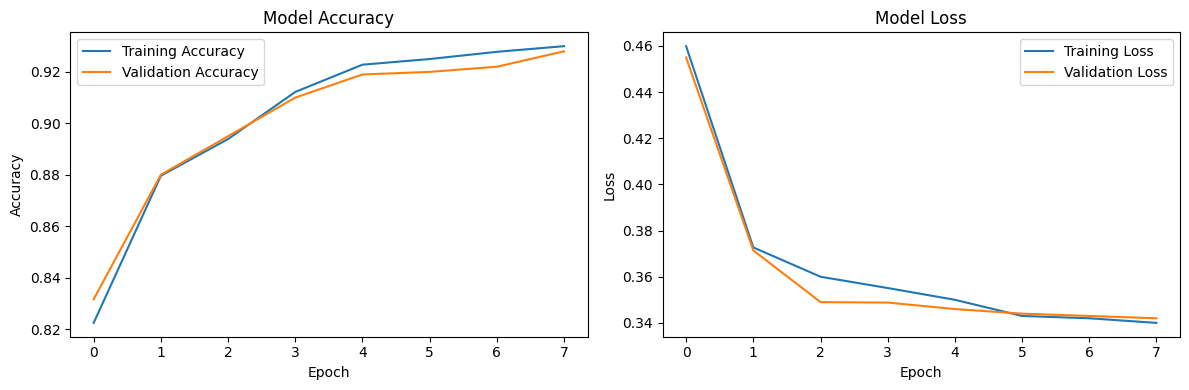

In [ ]:
# Visualisasi training history
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss,label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(len(train_loss)))
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    balanced_accuracy_score
)
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Load the saved model and tokenizer using os.path.join
model_dir = os.path.join("model")
model = TFAutoModelForSequenceClassification.from_pretrained(model_dir)
tokenizer = AutoTokenizer.from_pretrained(model_dir)

# Tokenize test data
test_encodings = tokenizer(
    list(test_texts),
    truncation=True,
    padding=True,
    max_length=256,
    return_tensors='tf'
)

# Get predictions
logits = model.predict(dict(test_encodings)).logits
y_pred = np.argmax(logits, axis=1)

# Calculate metrics
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred, average='macro')
recall = recall_score(test_labels, y_pred, average='macro')
f1 = f1_score(test_labels, y_pred, average='macro')
balanced_accuracy = balanced_accuracy_score(test_labels, y_pred)

# Print results
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(test_labels, y_pred, target_names=['Positive', 'Negative', 'Neutral']))

Some layers from the model checkpoint at model were not used when initializing TFBertForSequenceClassification: ['dropout_417']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


21/21 [==============================] - 7s 213ms/step

Model Evaluation Metrics:
Accuracy: 0.9349
Balanced Accuracy: 0.7623
Precision: 0.8224
Recall: 0.7623
F1-Score: 0.7846

Detailed Classification Report:
              precision    recall  f1-score   support

    Positive       0.97      0.98      0.97       423
    Negative       0.90      0.92      0.91       191
     Neutral       0.60      0.39      0.47        31

    accuracy                           0.93       645
   macro avg       0.82      0.76      0.78       645
weighted avg       0.93      0.93      0.93       645



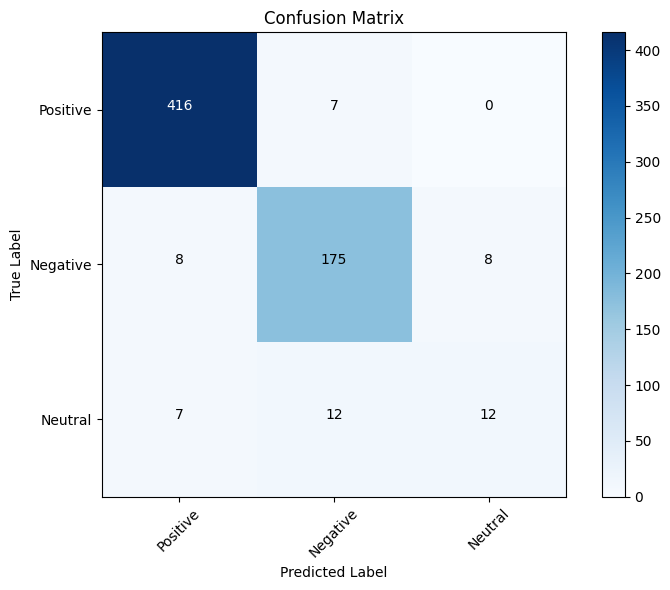

In [ ]:
# Confusion Matrix
cm = confusion_matrix(test_labels, y_pred)
labels = ['Positive', 'Negative', 'Neutral']

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Add labels
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Add values in matrix
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()